In [1]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym_map_bro
import gym_map_bro.src.toy_agents as toy_agents
from gym_map_bro.src.data import *
from gym_map_bro.src.datastore import *

env = gym.make('map-bro-v0')
batch_size = 5

In [2]:
env_config = {
    "col" : "dns.col",
    "N_batch": batch_size,										# Number of new lines to try to add to the datastores each epoch
    "batch_stocahsitic": False,							# Whether or not the number of lines in each batch is constant (False) or not (True)
    "name": ['deletion','Hot','Warm','Cold'],			# Names to identify different storage formats
    "ds_size": [10, 20, 40],							# Number of lines in each datastore
    "ds_frac": [1, 0.5, 0.25],							# Value coefficient associated with each storage option
    "val_weight": [np.array([1,1,1]),np.array([1,1,1]),np.array([1,1,1])],								# Weights applied to each value column
    "val_func": linear_val_func,# function for determining total value from various value columns
    "ds_decay": [0.9, 0.95, 0.99],						# Rate at which Value decays in each DataStore
    "vals": [pd.DataFrame(index = np.arange(10),columns=['Age','Key Terrain','Queries']),		# Values associated with each line of data
               pd.DataFrame(index = np.arange(20),columns=['Age','Key Terrain','Queries']),
               pd.DataFrame(index = np.arange(40),columns=['Age','Key Terrain','Queries'])],
    "init_rplan": [np.hstack((np.mgrid[0:10, 1:4][1].astype(int),np.zeros(10).reshape(-1,1).astype(int))),
                    np.hstack((np.mgrid[0:20, 1:4][1].astype(int),np.zeros(20).reshape(-1,1).astype(int))),
                    np.hstack((np.mgrid[0:40, 1:4][1].astype(int),np.zeros(40).reshape(-1,1).astype(int)))], #Initially start with a hot to cold retention plan for data
    "ind": [np.zeros(10).astype(int),np.zeros(20).astype(int),np.zeros(40).astype(int)], #All data is initialized to the first step of it's rplan
    "init_expir": [5,10,50], #Data 20 time steps old must be re-evaluated
    "df": [pd.DataFrame(index = np.arange(10),columns=['Age','Key Terrain','Queries']),		# Dataframes that hold actual datastore contents
           pd.DataFrame(index = np.arange(20),columns=['Age','Key Terrain','Queries']),
           pd.DataFrame(index = np.arange(40),columns=['Age','Key Terrain','Queries'])]
}

## Individual Stepper

In [3]:
env.__myinit__(env_config)
np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals_plot = [[0],[0],[0]]
t = 0

0 rows expired in 3     Age  Key Terrain  Queries
0   2.0         0.25     0.25
1   5.0         1.00     1.00
2   4.0         0.25     0.25
3   3.0         0.25     0.25
4   2.0         0.25     0.25
5   2.0         0.25     0.25
6   NaN          NaN      NaN
7   NaN          NaN      NaN
8   NaN          NaN      NaN
9   NaN          NaN      NaN
10  NaN          NaN      NaN
11  NaN          NaN      NaN
12  NaN          NaN      NaN
13  NaN          NaN      NaN
14  NaN          NaN      NaN
15  NaN          NaN      NaN
16  NaN          NaN      NaN
17  NaN          NaN      NaN
18  NaN          NaN      NaN
19  NaN          NaN      NaN
20  NaN          NaN      NaN
21  NaN          NaN      NaN
22  NaN          NaN      NaN
23  NaN          NaN      NaN
24  NaN          NaN      NaN
25  NaN          NaN      NaN
26  NaN          NaN      NaN
27  NaN          NaN      NaN
28  NaN          NaN      NaN
29  NaN          NaN      NaN
30  NaN          NaN      NaN
31  NaN          NaN

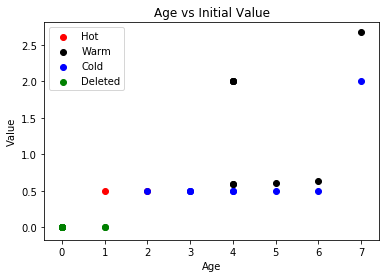

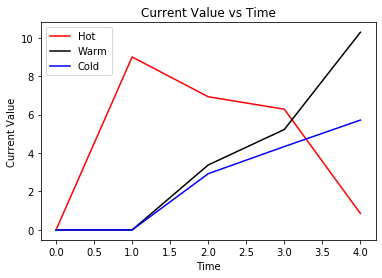

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]


In [7]:
# This cell can be run repeatedly to import new batches from a bro file

# New batch of 5 lines, here represented by 5 random values
batch = pd.read_csv("dns.log",header = 0)
vals = pd.DataFrame(np.ones((5,3))*0.25,columns=['Age','Key Terrain','Queries'])#np.random.random((5,3)),columns=['Age','Key Terrain','Queries'])
vals['Age'] = 0
val_tot = np.zeros(5)
rplan = np.hstack((np.mgrid[0:5, 1:4][1].astype(int),np.zeros(5).reshape(-1,1).astype(int)))
ind = np.zeros(5)
loop += 5
db = dataBatch(batch,vals,val_tot,ind,rplan)

toy_agents.batch_load_static(env, db, 100)
t += 1
env.render(out=0)
clr = ['r','k','b']
sub = plt.subplot()
sub.set_title('Current Value vs Time')
sub.set_xlabel('Time')
sub.set_ylabel('Current Value')
for i in np.arange(env.num_ds):
    vals_plot[i].append(sum(env.ds[env.names[i+1]].dataBatch.get('val_tot')))
    sub.plot(np.arange(t+1),vals_plot[i], c = clr[i], label = env.names[i+1])

sub.legend(loc=2)
plt.show()

#env.render(out=1)
print(env.del_val)

## RL agent run

0 rows expired in 1    Age Key Terrain Queries
0  NaN         NaN     NaN
1  NaN         NaN     NaN
2  NaN         NaN     NaN
3  NaN         NaN     NaN
4  NaN         NaN     NaN
5  NaN         NaN     NaN
6  NaN         NaN     NaN
7  NaN         NaN     NaN
8  NaN         NaN     NaN
9  NaN         NaN     NaN
0 rows expired in 2     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
0 rows expired in 3     Age Key Terrain Queries
0   NaN         NaN     NaN

/Users/afitts/projects/MAP_bro/gym_map_bro/src/data.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.batch[i].val['Age'] += 1


Cold     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
20  NaN         NaN     NaN
21  NaN         NaN     NaN
22  NaN         NaN     NaN
23  NaN         NaN     NaN
24  NaN         NaN     NaN
25  NaN         NaN     NaN
26  NaN         NaN     NaN
27  NaN         NaN     NaN
28  NaN         NaN     NaN
29  NaN         NaN     NaN
30  NaN         NaN     NaN
31  NaN         NaN     NaN
32  NaN         NaN     NaN
33  NaN         NaN     NaN
34  NaN        

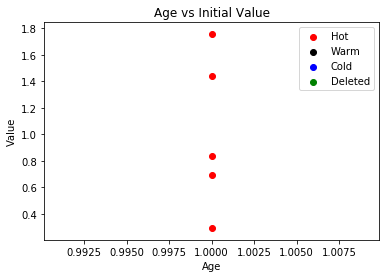

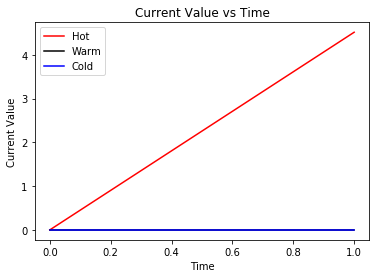

[]
0 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.720324  0.000114
1  1.0     0.146756  0.092339
2  1.0     0.345561  0.396767
3  1.0     0.419195  0.685220
4  1.0     0.878117  0.027388
5  NaN          NaN       NaN
6  NaN          NaN       NaN
7  NaN          NaN       NaN
8  NaN          NaN       NaN
9  NaN          NaN       NaN
0 rows expired in 2     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
0 rows expired in 3     Age Key Terrain

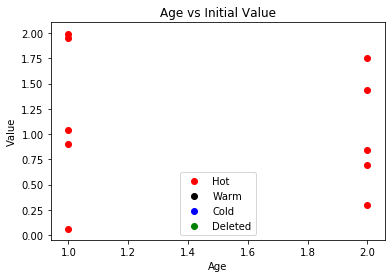

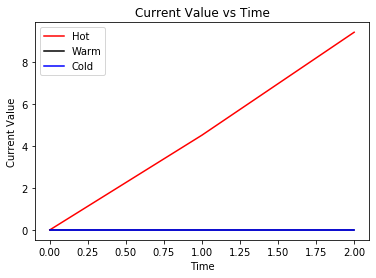

[]
0 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.720324  0.000114
1  2.0     0.146756  0.092339
2  2.0     0.345561  0.396767
3  2.0     0.419195  0.685220
4  2.0     0.878117  0.027388
5  1.0     0.519016  0.174720
6  1.0     0.996753  0.816835
7  1.0     0.975989  0.901563
8  1.0     0.032426  0.093577
9  1.0     0.451733  0.375435
0 rows expired in 2     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
0 rows expired in 3     Age Key Terrain

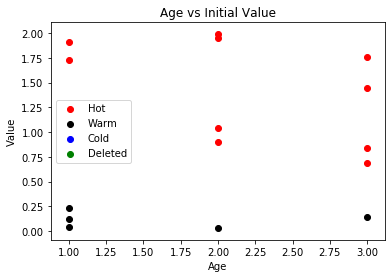

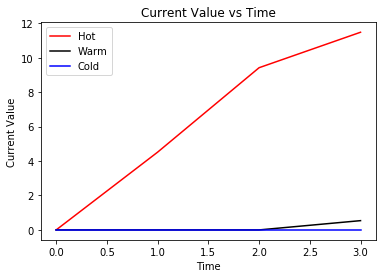

[]
0 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.720324  0.000114
1  1.0     0.863829  0.081624
2  3.0     0.345561  0.396767
3  3.0     0.419195  0.685220
4  3.0     0.878117  0.027388
5  2.0     0.519016  0.174720
6  2.0     0.996753  0.816835
7  2.0     0.975989  0.901563
8  1.0     0.952474  0.943893
9  2.0     0.451733  0.375435
0 rows expired in 2     Age  Key Terrain   Queries
0   2.0     0.032426  0.093577
1   3.0     0.146756  0.092339
2   1.0     0.235072  0.063343
3   1.0     0.125543  0.772886
4   1.0     0.043291  0.486441
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN

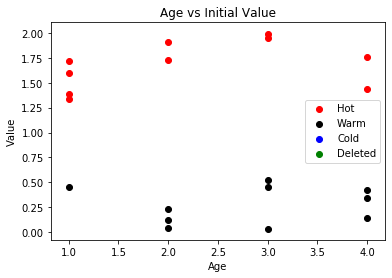

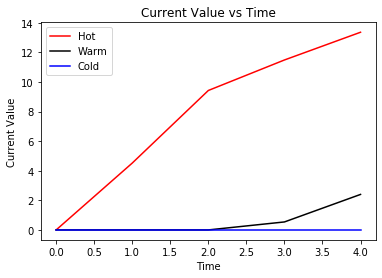

[]
0 rows expired in 1    Age  Key Terrain   Queries
0  4.0     0.720324  0.000114
1  2.0     0.863829  0.081624
2  1.0     0.860457  0.338451
3  1.0     0.800859  0.805985
4  4.0     0.878117  0.027388
5  1.0     0.691984  0.682907
6  3.0     0.996753  0.816835
7  3.0     0.975989  0.901563
8  2.0     0.952474  0.943893
9  1.0     0.669647  0.807779
0 rows expired in 2     Age  Key Terrain   Queries
0   3.0     0.032426  0.093577
1   4.0     0.146756  0.092339
2   2.0     0.235072  0.063343
3   2.0     0.125543  0.772886
4   2.0     0.043291  0.486441
5   4.0     0.345561  0.396767
6   4.0     0.419195  0.685220
7   3.0     0.451733  0.375435
8   3.0     0.519016  0.174720
9   1.0     0.453830  0.557825
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN

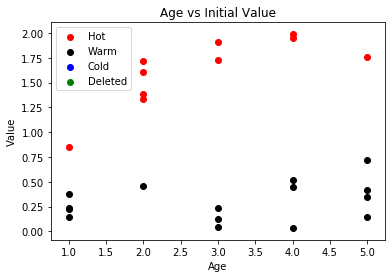

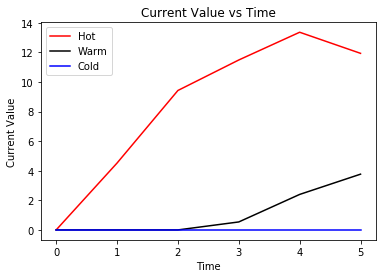

[]
1 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.422842  0.102757
1  3.0     0.863829  0.081624
2  2.0     0.860457  0.338451
3  2.0     0.800859  0.805985
4  5.0     0.878117  0.027388
5  2.0     0.691984  0.682907
6  4.0     0.996753  0.816835
7  4.0     0.975989  0.901563
8  3.0     0.952474  0.943893
9  2.0     0.669647  0.807779
0 rows expired in 2     Age  Key Terrain   Queries
0   4.0     0.032426  0.093577
1   5.0     0.146756  0.092339
2   3.0     0.235072  0.063343
3   3.0     0.125543  0.772886
4   3.0     0.043291  0.486441
5   5.0     0.345561  0.396767
6   5.0     0.419195  0.685220
7   4.0     0.451733  0.375435
8   4.0     0.519016  0.174720
9   2.0     0.453830  0.557825
10  5.0     0.720324  0.000114
11  1.0     0.147569  0.851439
12  1.0     0.223645  0.032757
13  1.0     0.231703  0.413592
14  1.0     0.377217  0.424437
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN

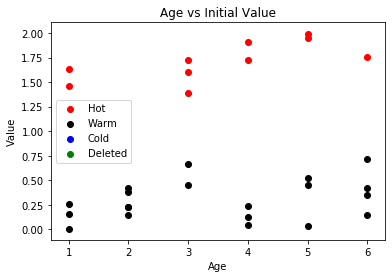

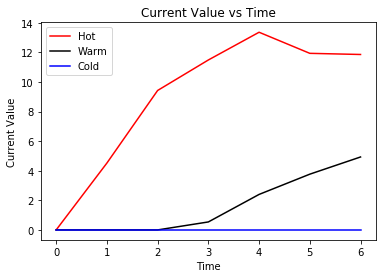

[]
3 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.814074  0.838403
1  4.0     0.863829  0.081624
2  3.0     0.860457  0.338451
3  3.0     0.800859  0.805985
4  1.0     0.728815  0.352389
5  3.0     0.691984  0.682907
6  5.0     0.996753  0.816835
7  5.0     0.975989  0.901563
8  4.0     0.952474  0.943893
9  6.0     0.878117  0.027388
0 rows expired in 2     Age  Key Terrain   Queries
0   5.0     0.032426  0.093577
1   6.0     0.146756  0.092339
2   4.0     0.235072  0.063343
3   4.0     0.125543  0.772886
4   4.0     0.043291  0.486441
5   6.0     0.345561  0.396767
6   6.0     0.419195  0.685220
7   5.0     0.451733  0.375435
8   5.0     0.519016  0.174720
9   3.0     0.453830  0.557825
10  6.0     0.720324  0.000114
11  2.0     0.147569  0.851439
12  2.0     0.223645  0.032757
13  2.0     0.231703  0.413592
14  2.0     0.377217  0.424437
15  1.0     0.258189  0.037240
16  1.0     0.152706  0.462084
17  2.0     0.422842  0.102757
18  3.0     0.669647  0.807779
19  1.0

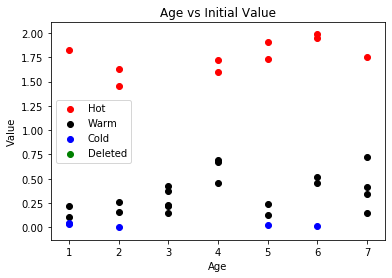

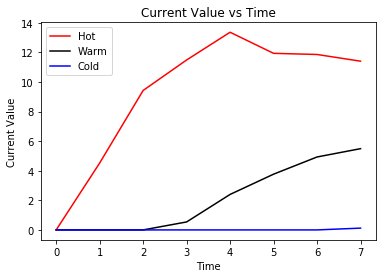

[]
5 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.814074  0.838403
1  5.0     0.863829  0.081624
2  4.0     0.860457  0.338451
3  4.0     0.800859  0.805985
4  2.0     0.728815  0.352389
5  7.0     0.878117  0.027388
6  6.0     0.975989  0.901563
7  6.0     0.996753  0.816835
8  5.0     0.952474  0.943893
9  1.0     0.911435  0.495497
0 rows expired in 2     Age  Key Terrain   Queries
0   1.0     0.101461  0.786269
1   7.0     0.146756  0.092339
2   5.0     0.235072  0.063343
3   5.0     0.125543  0.772886
4   4.0     0.691984  0.682907
5   7.0     0.345561  0.396767
6   7.0     0.419195  0.685220
7   6.0     0.451733  0.375435
8   6.0     0.519016  0.174720
9   4.0     0.453830  0.557825
10  7.0     0.720324  0.000114
11  3.0     0.147569  0.851439
12  3.0     0.223645  0.032757
13  3.0     0.231703  0.413592
14  3.0     0.377217  0.424437
15  2.0     0.258189  0.037240
16  2.0     0.152706  0.462084
17  3.0     0.422842  0.102757
18  4.0     0.669647  0.807779
19  1.0

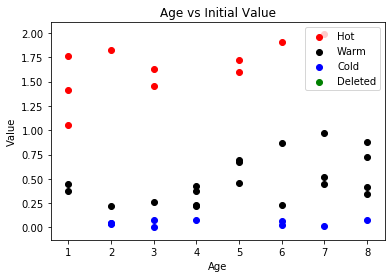

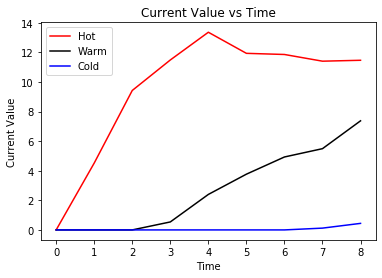

[]
4 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.814074  0.838403
1  7.0     0.996753  0.816835
2  5.0     0.860457  0.338451
3  5.0     0.800859  0.805985
4  3.0     0.728815  0.352389
5  6.0     0.952474  0.943893
6  1.0     0.528301  0.668569
7  1.0     0.708761  0.598536
8  1.0     0.879171  0.097839
9  2.0     0.911435  0.495497
0 rows expired in 2     Age  Key Terrain   Queries
0   1.0     0.379402  0.846356
1   8.0     0.878117  0.027388
2   6.0     0.235072  0.063343
3   1.0     0.451069  0.639857
4   5.0     0.691984  0.682907
5   8.0     0.345561  0.396767
6   8.0     0.419195  0.685220
7   7.0     0.451733  0.375435
8   7.0     0.519016  0.174720
9   5.0     0.453830  0.557825
10  8.0     0.720324  0.000114
11  6.0     0.863829  0.081624
12  4.0     0.223645  0.032757
13  4.0     0.231703  0.413592
14  4.0     0.377217  0.424437
15  3.0     0.258189  0.037240
16  7.0     0.975989  0.901563
17  4.0     0.422842  0.102757
18  5.0     0.669647  0.807779
19  2.0

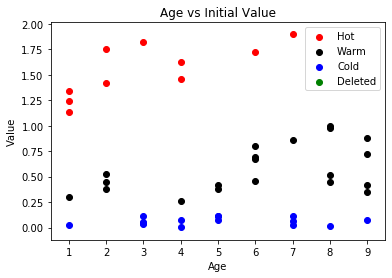

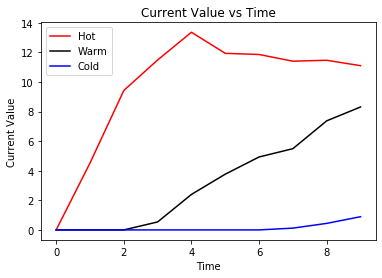

[]
2 rows expired in 1    Age  Key Terrain   Queries
0  4.0     0.814074  0.838403
1  7.0     0.952474  0.943893
2  1.0     0.566461  0.601842
3  1.0     0.620099  0.581175
4  4.0     0.728815  0.352389
5  1.0     0.672956  0.534168
6  6.0     0.860457  0.338451
7  2.0     0.708761  0.598536
8  2.0     0.879171  0.097839
9  3.0     0.911435  0.495497
0 rows expired in 2     Age  Key Terrain   Queries
0   2.0     0.379402  0.846356
1   9.0     0.878117  0.027388
2   1.0     0.297053  0.008945
3   2.0     0.451069  0.639857
4   6.0     0.691984  0.682907
5   9.0     0.345561  0.396767
6   9.0     0.419195  0.685220
7   8.0     0.451733  0.375435
8   8.0     0.519016  0.174720
9   6.0     0.453830  0.557825
10  9.0     0.720324  0.000114
11  7.0     0.863829  0.081624
12  2.0     0.528301  0.668569
13  8.0     0.996753  0.816835
14  5.0     0.377217  0.424437
15  4.0     0.258189  0.037240
16  8.0     0.975989  0.901563
17  5.0     0.422842  0.102757
18  6.0     0.669647  0.807779
19  6.0

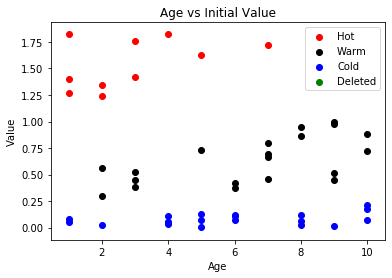

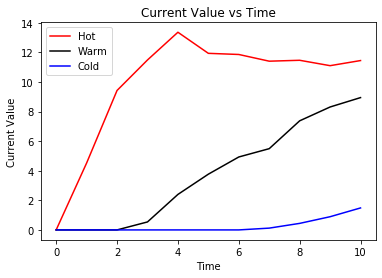

[]
2 rows expired in 1    Age  Key Terrain   Queries
0  5.0     0.814074  0.838403
1  1.0     0.702028  0.075233
2  7.0     0.860457  0.338451
3  2.0     0.620099  0.581175
4  1.0     0.636348  0.160087
5  2.0     0.672956  0.534168
6  1.0     0.913804  0.869771
7  3.0     0.708761  0.598536
8  3.0     0.879171  0.097839
9  4.0     0.911435  0.495497
2 rows expired in 2      Age  Key Terrain   Queries
0    3.0     0.379402  0.846356
1   10.0     0.878117  0.027388
2    2.0     0.297053  0.008945
3    3.0     0.451069  0.639857
4    7.0     0.691984  0.682907
5    2.0     0.566461  0.601842
6    8.0     0.952474  0.943893
7    9.0     0.451733  0.375435
8    9.0     0.519016  0.174720
9    7.0     0.453830  0.557825
10  10.0     0.720324  0.000114
11   8.0     0.863829  0.081624
12   3.0     0.528301  0.668569
13   9.0     0.996753  0.816835
14   6.0     0.377217  0.424437
15   5.0     0.728815  0.352389
16   9.0     0.975989  0.901563
17   6.0     0.422842  0.102757
18   7.0     0.6696

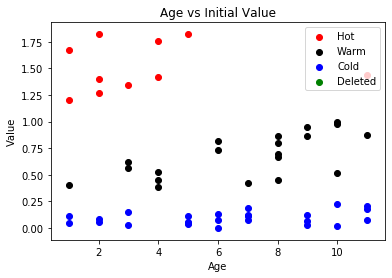

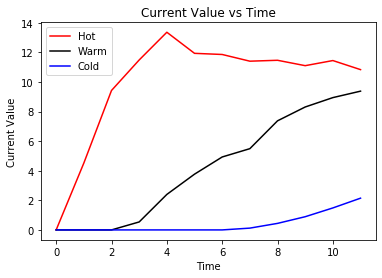

[]
2 rows expired in 1     Age  Key Terrain   Queries
0   1.0     0.835787  0.311299
1   2.0     0.702028  0.075233
2   1.0     0.602956  0.738828
3  11.0     0.720324  0.000114
4   2.0     0.636348  0.160087
5   3.0     0.672956  0.534168
6   2.0     0.913804  0.869771
7   4.0     0.708761  0.598536
8   4.0     0.879171  0.097839
9   5.0     0.911435  0.495497
4 rows expired in 2      Age  Key Terrain   Queries
0    4.0     0.379402  0.846356
1    3.0     0.620099  0.581175
2    6.0     0.814074  0.838403
3    4.0     0.451069  0.639857
4    8.0     0.691984  0.682907
5    3.0     0.566461  0.601842
6    9.0     0.952474  0.943893
7   11.0     0.878117  0.027388
8   10.0     0.519016  0.174720
9    8.0     0.453830  0.557825
10   1.0     0.400403  0.608779
11   9.0     0.863829  0.081624
12   4.0     0.528301  0.668569
13  10.0     0.996753  0.816835
14   8.0     0.860457  0.338451
15   6.0     0.728815  0.352389
16  10.0     0.975989  0.901563
17   7.0     0.422842  0.102757
18   8.0

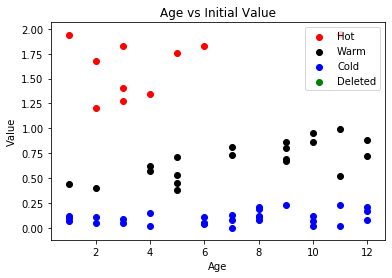

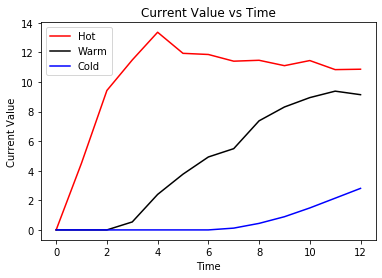

[]
3 rows expired in 1     Age  Key Terrain   Queries
0   2.0     0.835787  0.311299
1   3.0     0.702028  0.075233
2   2.0     0.602956  0.738828
3   6.0     0.911435  0.495497
4   3.0     0.636348  0.160087
5   4.0     0.672956  0.534168
6   3.0     0.913804  0.869771
7  11.0     0.975989  0.901563
8   5.0     0.879171  0.097839
9   1.0     0.967516  0.761953
6 rows expired in 2      Age  Key Terrain   Queries
0    5.0     0.379402  0.846356
1    4.0     0.620099  0.581175
2    7.0     0.814074  0.838403
3    5.0     0.451069  0.639857
4    9.0     0.691984  0.682907
5    4.0     0.566461  0.601842
6   10.0     0.952474  0.943893
7   12.0     0.720324  0.000114
8   12.0     0.878117  0.027388
9   11.0     0.996753  0.816835
10   2.0     0.400403  0.608779
11  10.0     0.863829  0.081624
12   5.0     0.528301  0.668569
13   5.0     0.708761  0.598536
14   9.0     0.860457  0.338451
15   7.0     0.728815  0.352389
16   1.0     0.436250  0.009477
17  11.0     0.519016  0.174720
18   9.0

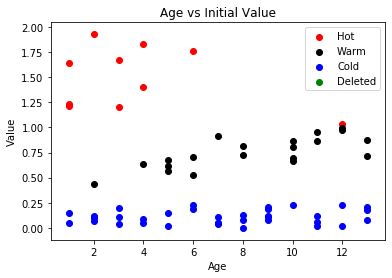

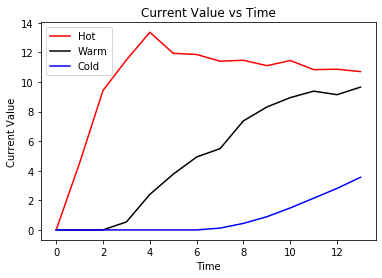

[]
2 rows expired in 1     Age  Key Terrain   Queries
0   3.0     0.835787  0.311299
1   4.0     0.702028  0.075233
2   3.0     0.602956  0.738828
3   1.0     0.822908  0.781010
4   6.0     0.879171  0.097839
5  12.0     0.519016  0.174720
6   4.0     0.913804  0.869771
7   1.0     0.606962  0.282451
8   1.0     0.616869  0.406849
9   2.0     0.967516  0.761953
10 rows expired in 2      Age  Key Terrain   Queries
0   13.0     0.878117  0.027388
1    5.0     0.620099  0.581175
2    8.0     0.814074  0.838403
3   12.0     0.996753  0.816835
4   10.0     0.691984  0.682907
5    5.0     0.566461  0.601842
6    5.0     0.672956  0.534168
7   11.0     0.952474  0.943893
8   13.0     0.720324  0.000114
9    4.0     0.636348  0.160087
10  11.0     0.863829  0.081624
11  12.0     0.975989  0.901563
12   6.0     0.528301  0.668569
13   6.0     0.708761  0.598536
14  10.0     0.860457  0.338451
15   8.0     0.728815  0.352389
16   2.0     0.436250  0.009477
17   7.0     0.911435  0.495497
18  10.

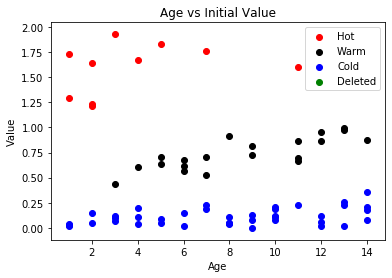

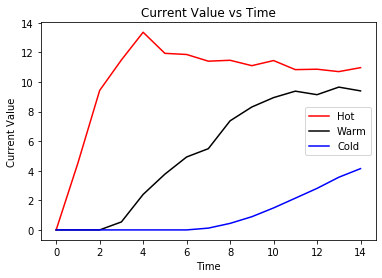

[]
3 rows expired in 1     Age  Key Terrain   Queries
0   4.0     0.835787  0.311299
1  11.0     0.800859  0.805985
2   7.0     0.879171  0.097839
3   2.0     0.822908  0.781010
4   1.0     0.646053  0.525533
5   1.0     0.864040  0.707927
6   5.0     0.913804  0.869771
7   2.0     0.606962  0.282451
8   2.0     0.616869  0.406849
9   3.0     0.967516  0.761953
8 rows expired in 2      Age  Key Terrain   Queries
0   13.0     0.975989  0.901563
1    6.0     0.620099  0.581175
2    9.0     0.814074  0.838403
3   12.0     0.863829  0.081624
4   11.0     0.669647  0.807779
5    6.0     0.566461  0.601842
6    6.0     0.672956  0.534168
7    4.0     0.602956  0.738828
8    5.0     0.702028  0.075233
9    5.0     0.636348  0.160087
10  11.0     0.860457  0.338451
11  14.0     0.878117  0.027388
12   7.0     0.528301  0.668569
13   7.0     0.708761  0.598536
14  13.0     0.996753  0.816835
15   9.0     0.728815  0.352389
16   3.0     0.436250  0.009477
17   8.0     0.911435  0.495497
18  11.0

In [ ]:
env.__myinit__(env_config)
np.random.seed(1)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals_plot = [[0],[0],[0]]
t = 0

for q in np.arange(20):
    # New batch of 5 lines, here represented by 5 random values
    batch = pd.read_csv("dns.log",header = 0)
    vals = pd.DataFrame(np.random.random((batch_size,3)),columns=['Age','Key Terrain','Queries'])
    vals['Age'] = 0
    val_tot = vals.drop(['Age'],axis=1).sum(axis=1).values
    rplan = np.hstack((np.mgrid[0:batch_size, 1:4][1].astype(int),np.zeros(batch_size).reshape(-1,1).astype(int)))
    ind = np.zeros(batch_size).astype(int)
    loop += batch_size
    db = dataBatch(batch,vals,val_tot,ind,rplan)

    toy_agents.batch_load(env, db, 100)
    t += 1
    env.render(out=0)
    clr = ['r','k','b']
    sub = plt.subplot()
    sub.set_title('Current Value vs Time')
    sub.set_xlabel('Time')
    sub.set_ylabel('Current Value')
    for i in np.arange(env.num_ds):
        vals_plot[i].append(sum(np.nan_to_num(env.ds[env.names[i+1]].dataBatch.get('val_tot'))))
        sub.plot(np.arange(t+1),vals_plot[i], c = clr[i], label = env.names[i+1])

    sub.legend(loc='best')
    plt.show()

    #env.render(out=1)
    print(env.del_val)

In [5]:
(0.996753+0.816835)*(.9)**18

0.2722098294390141

In [ ]:
Hot     Age  Key Terrain   Queries
0   2.0     0.709689  0.955583
1  18.0     0.996753  0.816835
2   1.0     0.946356  0.311564-
3   2.0     0.972748  0.755513-
4   1.0     0.688327  0.658628-
5   1.0     0.820426  0.495420-
6   3.0     0.679821  0.543865
7   1.0     0.849449  0.652987-
8   4.0     0.903572  0.030298
9   3.0     0.997474  0.811471-

In [7]:
np.sum(vals_plot,axis=0)

array([ 0.        ,  4.51791551,  9.42277627, 12.02214339, 15.75564116,
       15.69891407, 16.78336764, 17.01369714, 19.27644189, 20.29719531,
       21.87024046, 22.35324883, 22.80394821, 23.90609135, 24.50076005,
       24.88015798, 26.1630219 , 27.48835402, 28.48687933, 30.97932968,
       32.56136093, 32.51676211, 31.47202378, 31.93550927, 33.00679029,
       32.74071685, 33.25691716, 33.26385068, 34.02750601, 34.95952336,
       35.36340784, 35.36717016, 34.55349315, 33.8385171 , 35.29865971,
       35.24694519, 33.33142079, 33.38715344, 34.29224218, 32.46168511,
       33.03026877])

## Static Policy

before Hot 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Age, dtype: float64
after Hot 10 0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Age, dtype: float64
before Warm 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Age, dtype: object
after Warm 20 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Age, dtype: object
before Cold 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    

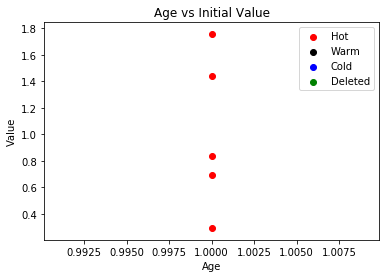

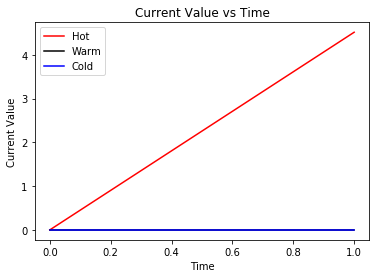

[]
before Hot 0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Age, dtype: float64
after Hot 10 0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: Age, dtype: float64
before Warm 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Age, dtype: object
after Warm 20 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Age, dtype: object
before Cold 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25 

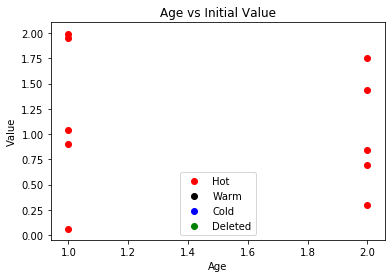

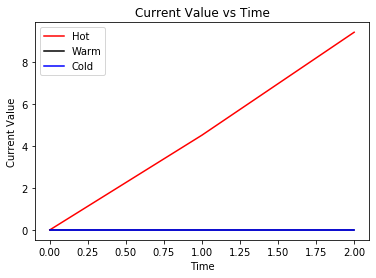

[]
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
before Hot 0    2.0
1    0.0
2    2.0
3    2.0
4    2.0
5    1.0
6    1.0
7    1.0
8    0.0
9    1.0
Name: Age, dtype: float64
after Hot 10 0    3.0
1    1.0
2    3.0
3    3.0
4    3.0
5    2.0
6    2.0
7    2.0
8    1.0
9    2.0
Name: Age, dtype: float64
before Warm 0     1.0
1     2.0
2     0.0
3     0.0
4     0.0
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Age, dtype: float64
after Warm 20 0     2.0
1     3.0
2     1.0
3     1.0
4     1.0
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Age, dtype: float64
before Cold 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7

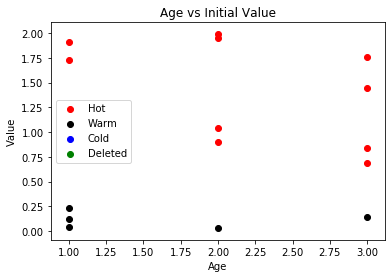

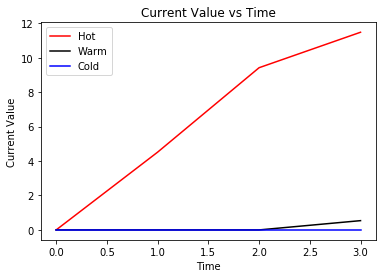

[]
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
before Hot 0    3.0
1    1.0
2    0.0
3    0.0
4    3.0
5    0.0
6    2.0
7    2.0
8    1.0
9    0.0
Name: Age, dtype: float64
after Hot 10 0    4.0
1    2.0
2    1.0
3    1.0
4    4.0
5    1.0
6    3.0
7    3.0
8    2.0
9    1.0
Name: Age, dtype: float64
before Warm 0     2.0
1     3.0
2     1.0
3     1.0
4     1.0
5     3.0
6     3.0
7     2.0
8     2.0
9     0.0
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Age, dtype: float64
after Warm 20 0     3.0
1     4.0
2     2.0
3     2.0
4     2.0
5     4.0
6     4.0
7     3.0
8     3.0
9     1.0
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Age, dtype: float64
before Cold 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7

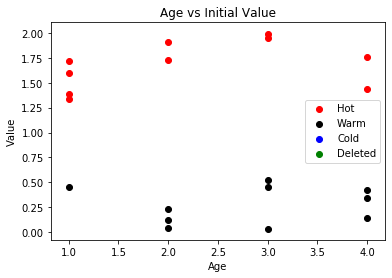

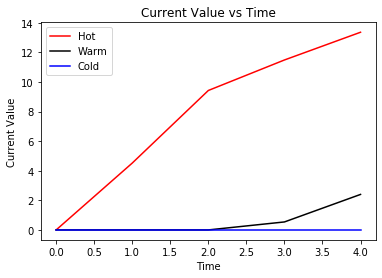

[]
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
before Hot 0    0.0
1    2.0
2    1.0
3    1.0
4    4.0
5    1.0
6    3.0
7    3.0
8    2.0
9    1.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    3.0
2    2.0
3    2.0
4    5.0
5    2.0
6    4.0
7    4.0
8    3.0
9    2.0
Name: Age, dtype: float64
before Warm 0     3.0
1     4.0
2     2.0
3     2.0
4     2.0
5     4.0
6     4.0
7     3.0
8     3.0
9     1.0
10    4.0
11    0.0
12    0.0
13    0.0
14    0.0
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Age, dtype: float64
after Warm 20 0     4.0
1     5.0
2     3.0
3     3.0
4     3.0
5     5.0
6     5.0
7     4.0
8     4.0
9     2.0
10    5.0
11    1.0
12    1.0
13    1.0
14    1.0
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Age, dtype: float64
before Cold 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7

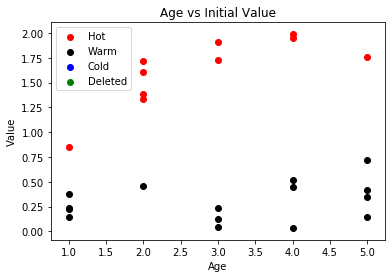

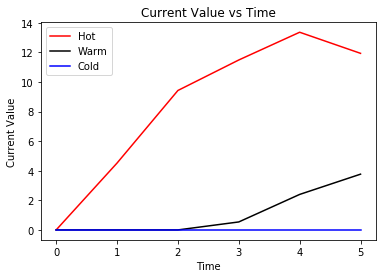

[]
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
before Hot 0    0.0
1    3.0
2    2.0
3    2.0
4    0.0
5    2.0
6    4.0
7    4.0
8    3.0
9    0.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    4.0
2    3.0
3    3.0
4    1.0
5    3.0
6    5.0
7    5.0
8    4.0
9    1.0
Name: Age, dtype: float64
before Warm 0     4.0
1     5.0
2     3.0
3     3.0
4     3.0
5     5.0
6     5.0
7     4.0
8     4.0
9     2.0
10    5.0
11    1.0
12    1.0
13    1.0
14    1.0
15    5.0
16    0.0
17    0.0
18    1.0
19    2.0
Name: Age, dtype: float64
after Warm 20 0     5.0
1     6.0
2     4.0
3     4.0
4     4.0
5     6.0
6     6.0
7     5.0
8     5.0
9     3.0
10    6.0
11    2.0
12    2.0
13    2.0
14    2.0
15    6.0
16    1.0
17    1.0
18    2.0
19    3.0
Name: Age, dtype: float64
before Cold 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    N

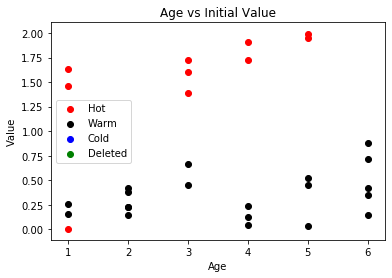

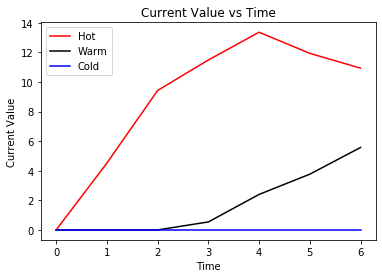

[]
Warms lowest value is 0.10225564758364168, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
Warms lowest value is 0.004051767486751778, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
Warms lowest value is 0.016624106532905913, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
before Hot 0    1.0
1    4.0
2    3.0
3    3.0
4    1.0
5    3.0
6    0.0
7    0.0
8    4.0
9    0.0
Name: Age, dtype: float64
after Hot 10 0    2.0
1    5.0
2    4.0
3    4.0
4    2.0
5    4.0
6    1.0
7    1.0
8    5.0
9    1.0
Name: Age, dtype: float64
before Warm 0     5.0
1     6.0
2     4.0
3     0.0
4     5.0
5     6.0
6     6.0
7     5.0
8     5.0
9     3.0
10    6.0
11    2.0
12    2.0
13    2.0
14    2.0
15    6.0
16    1.0
17    1.0
18    2.0
19    3.0
Name: Age, dtype: float64
after Warm 20 0     6.0
1     7.0
2     5.0
3     1.0
4     6.0
5     7.0
6     7.0
7     6.0
8     6.0
9     4.0
10    7.0
11    3.0
12    3.0
13    3.0
14    3.0
15    7.0
16    2.0
17    2.0
18    3.0
19    4.0
Name: Age, dtype: float

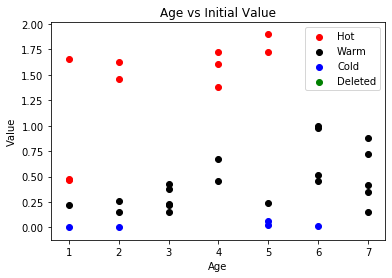

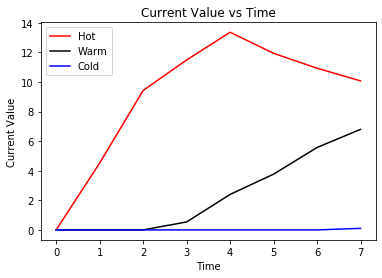

[]
Warms lowest value is 0.13781710289101176, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
Warms lowest value is 0.18189412737621777, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
Warms lowest value is 0.19174767090898406, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
before Hot 0    2.0
1    0.0
2    4.0
3    4.0
4    2.0
5    4.0
6    0.0
7    1.0
8    0.0
9    0.0
Name: Age, dtype: float64
after Hot 10 0    3.0
1    1.0
2    5.0
3    5.0
4    3.0
5    5.0
6    1.0
7    2.0
8    1.0
9    1.0
Name: Age, dtype: float64
before Warm 0     6.0
1     5.0
2     1.0
3     1.0
4     6.0
5     7.0
6     7.0
7     6.0
8     6.0
9     4.0
10    7.0
11    5.0
12    1.0
13    3.0
14    3.0
15    7.0
16    2.0
17    0.0
18    3.0
19    4.0
Name: Age, dtype: float64
after Warm 20 0     7.0
1     6.0
2     2.0
3     2.0
4     7.0
5     8.0
6     8.0
7     7.0
8     7.0
9     5.0
10    8.0
11    6.0
12    2.0
13    4.0
14    4.0
15    8.0
16    3.0
17    1.0
18    4.0
19    5.0
Name: Age, dtype: float64

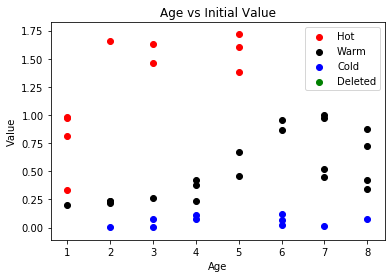

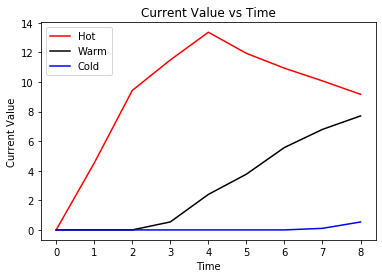

[]
Warms lowest value is 0.20871602613410736, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
Warms lowest value is 0.15735769265527025, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
before Hot 0    3.0
1    1.0
2    0.0
3    0.0
4    3.0
5    0.0
6    0.0
7    2.0
8    1.0
9    1.0
Name: Age, dtype: float64
after Hot 10 0    4.0
1    2.0
2    1.0
3    1.0
4    4.0
5    1.0
6    1.0
7    3.0
8    2.0
9    2.0
Name: Age, dtype: float64
before Warm 0     7.0
1     6.0
2     0.0
3     5.0
4     7.0
5     8.0
6     8.0
7     7.0
8     7.0
9     5.0
10    8.0
11    6.0
12    2.0
13    5.0
14    4.0
15    8.0
16    3.0
17    5.0
18    4.0
19    5.0
Name: Age, dtype: float64
after Warm 20 0     8.0
1     7.0
2     1.0
3     6.0
4     8.0
5     9.0
6     9.0
7     8.0
8     8.0
9     6.0
10    9.0
11    7.0
12    3.0
13    6.0
14    5.0
15    9.0
16    4.0
17    6.0
18    5.0
19    6.0
Name: Age, dtype: float64
before Cold 0     7.0
1     6.0
2     6.0
3     3.0
4     2.0
5     8.0
6     4.0
7    

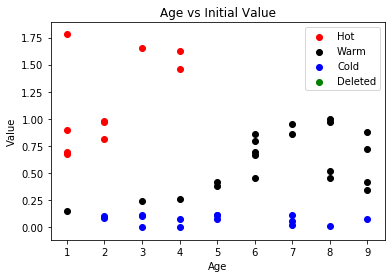

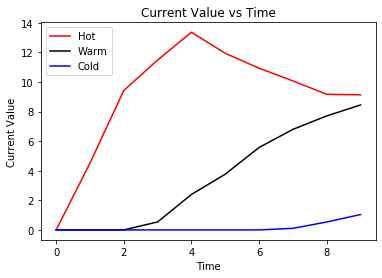

[]
Warms lowest value is 0.14256240064160963, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
Warms lowest value is 0.20475326753499407, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
Warms lowest value is 0.10396858324133318, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
Warms lowest value is 0.2102962805132457, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
Warms lowest value is 0.2177894442428876, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
before Hot 0    4.0
1    0.0
2    0.0
3    0.0
4    4.0
5    1.0
6    1.0
7    3.0
8    2.0
9    2.0
Name: Age, dtype: float64
after Hot 10 0    5.0
1    1.0
2    1.0
3    1.0
4    5.0
5    2.0
6    2.0
7    4.0
8    3.0
9    3.0
Name: Age, dtype: float64
before Warm 0     8.0
1     7.0
2     1.0
3     6.0
4     8.0
5     0.0
6     9.0
7     8.0
8     8.0
9     6.0
10    9.0
11    7.0
12    1.0
13    6.0
14    5.0
15    9.0
16    2.0
17    6.0
18    5.0
19    6.0
Name: Age, dtype: float64
after Warm 20 0      9.0
1      8.0
2      2.0
3      7.0
4      

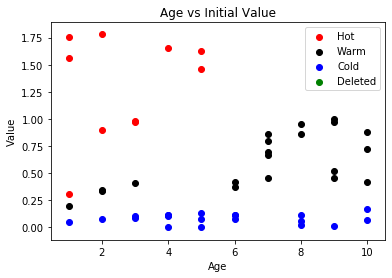

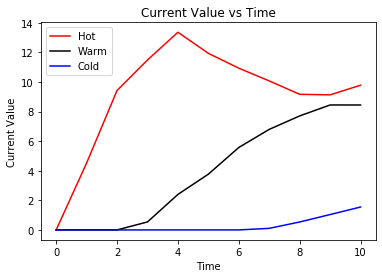

[]
Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.1468467804323707, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
Warms lowest value is 0.18898106360881223, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
before Hot 0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
5    2.0
6    2.0
7    4.0
8    3.0
9    0.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    1.0
2    2.0
3    2.0
4    1.0
5    3.0
6    3.0
7    5.0
8    4.0
9    1.0
Name: Age, dtype: float64
before Warm 0     9.0
1     8.0
2     2.0
3     7.0
4     9.0
5     0.0
6     5.0
7     9.0
8     9.0
9     7.0
10    5.0
11    8.0
12    2.0
13    7.0
14    6.0
15    3.0
16    3.0
17    7.0
18    6.0
19    7.0
Name: Age, dtype: float64
after Warm 20 0     10.0
1      9.0
2      3.0
3      8.0
4     10.0
5      1.0
6      6.0
7     10.0
8     10.0
9      8.0
10     6.0
11     9.0
12     3.0
13     8.0
14     7.0
15     4.0
16     4.0
17     8.0
18     7.0
19     8.0
Name: Age, dtype: float64
before Cold 0      9.0
1      8.

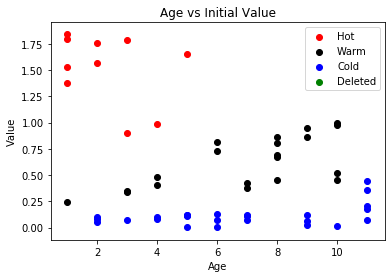

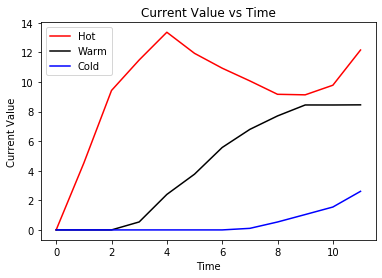

[]
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.22947676563982689, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
before Hot 0    1.0
1    1.0
2    2.0
3    2.0
4    1.0
5    0.0
6    3.0
7    0.0
8    0.0
9    1.0
Name: Age, dtype: float64
after Hot 10 0    2.0
1    2.0
2    3.0
3    3.0
4    2.0
5    1.0
6    4.0
7    1.0
8    1.0
9    2.0
Name: Age, dtype: float64
before Warm 0     5.0
1     9.0
2     3.0
3     8.0
4     4.0
5     0.0
6     6.0
7     0.0
8     3.0
9     8.0
10    6.0
11    9.0
12    3.0
13    8.0
14    7.0
15    4.0
16    4.0
17    8.0
18    7.0
19    8.0
Name: Age, dtype: float64
after Warm 20 0      6.0
1     10.0
2      4.0
3      9.0
4      5.0
5      1.0
6      7.0
7      1.0
8      4.0
9      9.0
10     7.0
11    10.0
12     4.0
13     9.0
14     8.0
15     5.0
16     5.0
17     9.0
18     8.0
19     9.0
Name: Age, dtype: float64
before Cold 0     10.0
1      9.0
2      9.0
3 

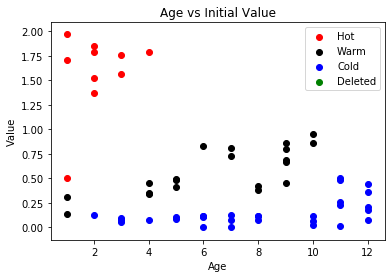

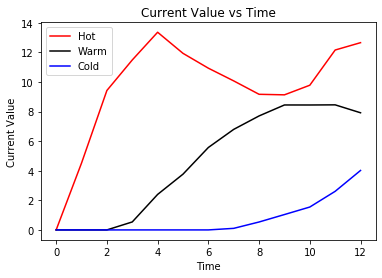

[]
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.041346126516882076, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
Warms lowest value is 0.12993613300205262, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
Warms lowest value is 0.23929116316293725, BOUNCE 0
Colds lowest value is nan, BOUNCE 1
before Hot 0    0.0
1    2.0
2    3.0
3    3.0
4    2.0
5    0.0
6    4.0
7    1.0
8    1.0
9    2.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    3.0
2    4.0
3    4.0
4    3.0
5    1.0
6    5.0
7    2.0
8    2.0
9    3.0
Name: Age, dtype: float64
before Warm 0     6.0
1     0.0
2     4.0
3     9.0
4     5.0
5     2.0
6     7.0
7     1.0
8     4.0
9     9.0
10    7.0
11    0.0
12    4.0
13    9.0
14    8.0
15    5.0
16    5.0
17    9.0
18    8.0
19    9.0
Name: Age, dtype: float64
after Warm 20 0      7.0
1      1.0
2      5.0
3     10.0
4      6.0
5      3.0
6      8.0
7      2.0
8      5.0
9     10.0
10     8.0
11     1.0
12     5.0
13    10.

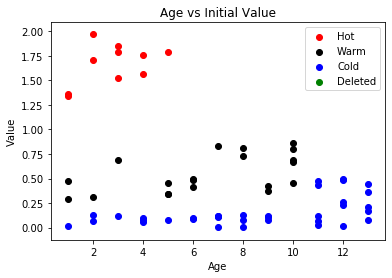

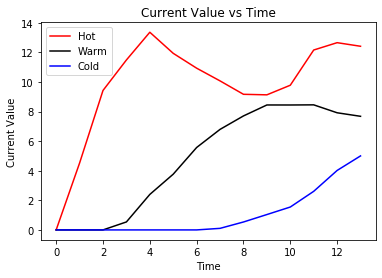

[]
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
before Hot 0    1.0
1    0.0
2    4.0
3    0.0
4    3.0
5    1.0
6    0.0
7    2.0
8    2.0
9    3.0
Name: Age, dtype: float64
after Hot 10 0    2.0
1    1.0
2    5.0
3    1.0
4    4.0
5    2.0
6    1.0
7    3.0
8    3.0
9    4.0
Name: Age, dtype: float64
before Warm 0     7.0
1     1.0
2     5.0
3     5.0
4     6.0
5     3.0
6     8.0
7     2.0
8     5.0
9     4.0
10    8.0
11    1.0
12    5.0
13    3.0
14    9.0
15    6.0
16    6.0
17    0.0
18    9.0
19    0.0
Name: Age, dtype: float64
after Warm 20 0      8.0
1      2.0
2      6.0
3      6.0
4      7.0
5      4.0
6      9.0
7      3.0
8      6.0
9      5.0
10     9.0
11     2.0
12     6.0
13     4.0
14    10.0
15     7.0
16     7.0
17     1.0
18    10.0
19     1.0
Name: Age, dtype: float64
before Cold 0     12.0
1     11.0
2     11.0
3      8.0
4      7.0
5     13.0
6      9.0
7      8.0

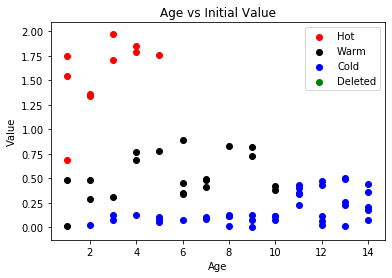

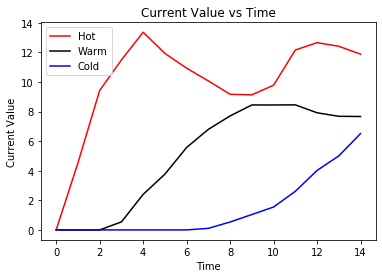

[]
Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.00734538667852535, BOUNCE 0
Colds lowest value is 0.014227391081019863, BOUNCE 1
Warms lowest value is 0.24923479981273308, BOUNCE 0
Colds lowest value is 0.0038273330588105775, BOUNCE 1
Warms lowest value is 0.25426343958818504, BOUNCE 0
Colds lowest value is 0.01918621634530453, BOUNCE 1
before Hot 0    2.0
1    0.0
2    0.0
3    1.0
4    4.0
5    0.0
6    1.0
7    3.0
8    3.0
9    4.0
Name: Age, dtype: float64
after Hot 10 0    3.0
1    1.0
2    1.0
3    2.0
4    5.0
5    1.0
6    2.0
7    4.0
8    4.0
9    5.0
Name: Age, dtype: float64
before Warm 0     8.0
1     2.0
2     2.0
3     6.0
4     7.0
5     4.0
6     9.0
7     3.0
8     6.0
9     5.0
10    9.0
11    2.0
12    0.0
13    4.0
14    5.0
15    7.0
16    7.0
17    1.0
18    1.0
19    0.0
Name: Age, dtype: float64
after Warm 20 0      9.0
1      3.0
2      3.0
3      7.0
4      8.0
5      5.0
6     10.0
7      4.0
8      7.0
9      6.0
10    10.0
11     3.0
12    

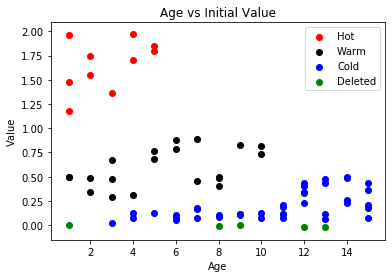

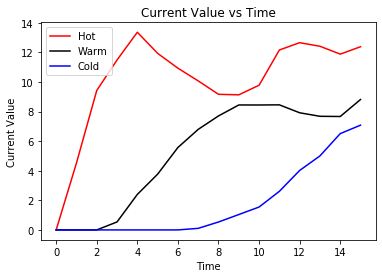

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453]]
Warms lowest value is 0.24542210123816094, BOUNCE 0
Colds lowest value is 0.05508335907491146, BOUNCE 1
Warms lowest value is 0.25083546199027723, BOUNCE 0
Colds lowest value is 0.06310931499504141, BOUNCE 1
Warms lowest value is 0.27107922476220336, BOUNCE 0
Colds lowest value is 0.06569270048242161, BOUNCE 1
before Hot 0    0.0
1    1.0
2    1.0
3    2.0
4    0.0
5    1.0
6    2.0
7    4.0
8    4.0
9    0.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    2.0
2    2.0
3    3.0
4    1.0
5    2.0
6    3.0
7    5.0
8    5.0
9    1.0
Name: Age, dtype: float64
before Warm 0     9.0
1     3.0
2     3.0
3     7.0
4     8.0
5     5.0
6     5.0
7     0.0
8     7.0
9     6.0
10    5.0
11    3.0
12    1.0
13    5.0
14    6.0
15    8.0
16    0.0
17    2.0
18    2.0
19    1.0
Name: Age, dtype: float64
after Warm 20 0     10.0
1      4.0
2      4

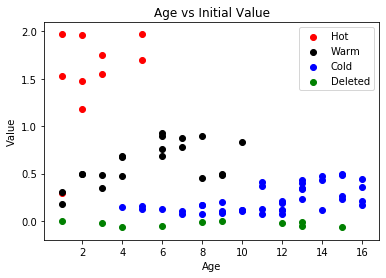

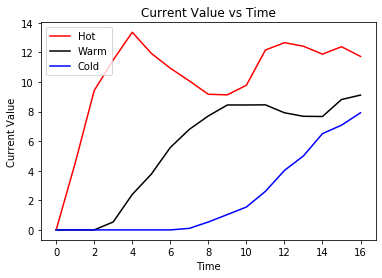

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161]]
Warms lowest value is 0.2862857041896441, BOUNCE 0
Colds lowest value is 0.06923615727208042, BOUNCE 1
Warms lowest value is 0.029580678088265255, BOUNCE 0
Colds lowest value is 0.07203726078564157, BOUNCE 1
Warms lowest value is 0.1405505614533883, BOUNCE 0
Colds lowest value is 0.014790339044132628, BOUNCE 1
before Hot 0    0.0
1    2.0
2    0.0
3    3.0
4    1.0
5    2.0
6    3.0
7    0.0
8    0.0
9    1.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    3.0
2    1.0
3    4.0
4    2.0
5    3.0
6    4.0
7    1.0
8    1.0
9    2.0
Name: Age, dtype: float64
before Warm 0     5.0
1     4.0
2     4.0
3     8.0
4     9.0
5     6.0
6     6.0
7     2.0
8     8.0
9     7.0
10    6.0
11    4.0
12    2

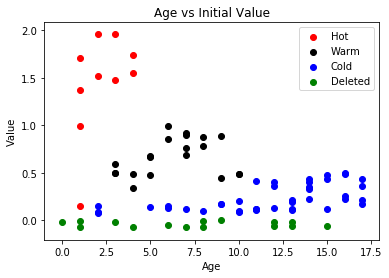

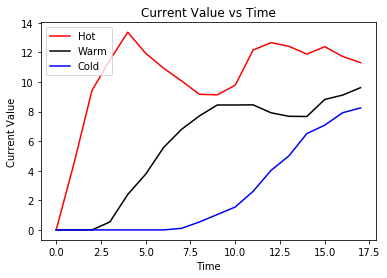

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628]]
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.07324219323906381, BOUNCE 0
Colds lowest value is 0.08578349100289881, BOUNCE 1
Warms lowest value is 0.2798038411071094, BOUNCE 0
Colds lowest value is 0.038163037529827984, BOUNCE 1
Warms lowest value is 0.2838375788880162, BOUNCE 0
Colds lowest value is 0.09150870035906594, BOUNCE 1
before Hot 0    1.0
1    3.0
2    0.0
3    0.0
4    2.0
5    3.0
6    4.0
7    1.0
8    0.0
9    2.0
Name: Age, dtype: float64
after Hot 10 0    2.0
1    4.0
2    1.0
3    1.0
4    3

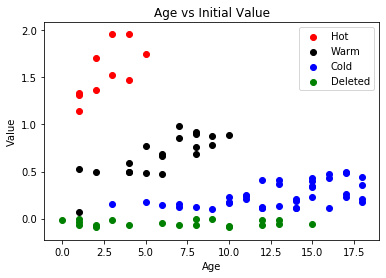

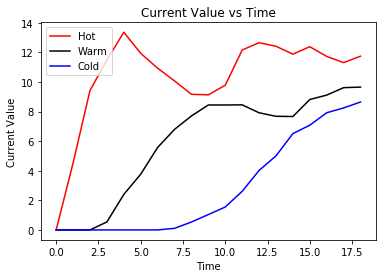

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594]]
Warms lowest value is 0.062049303536613386, BOUNCE 0
Colds lowest value is 0.09644102454000135, BOUNCE 1
Warms lowest value is 0.23500392135629045, BOUNCE 0
Colds lowest value is 0.03233095289539329, BOUNCE 1
Warms lowest value is 0.3036246065035826, BOUNCE 0
Colds lowest value is 0.09714534842419241, BOUNCE 1
Warms lowest value is 0.19847324077300432, BOUNCE 0
Colds lowest value is 0.10007688272302638, BOUNCE 1
before

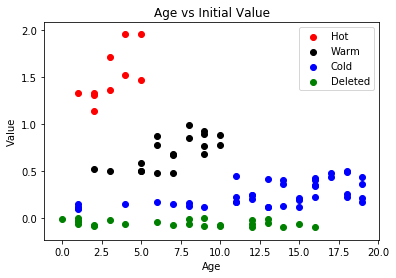

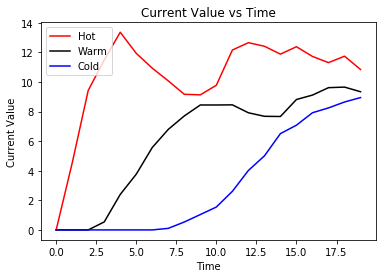

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638]]
Warms lowest value is 0.09486508719174028, BOUNCE 0
Colds lowest value is 0.10146964031550205, BOUNCE 1
Warms lowest value is 0.10892803404693119, BOUNCE 0
Colds lowest value is 0.04942970332622257, BOUNCE 1
Warms lowest value is 0.33341348121632114, BOUNCE 0
Colds lowest value 

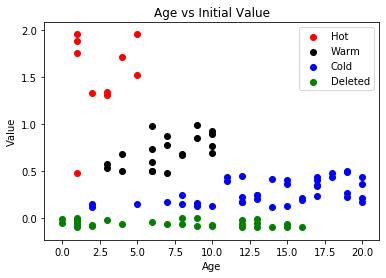

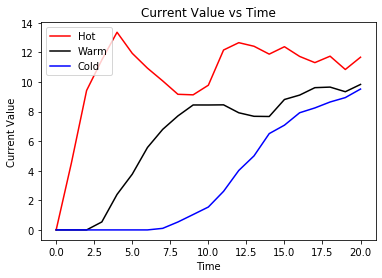

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594]]
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.22190823659918302, BOUNCE 0
Colds lowest

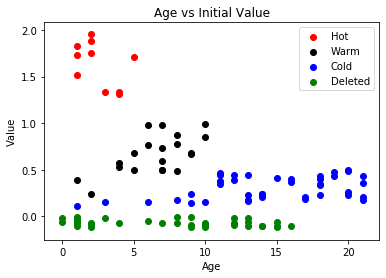

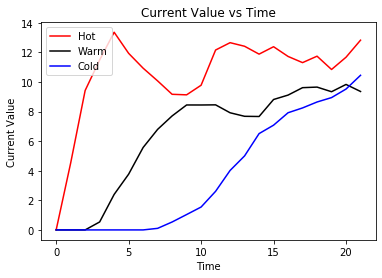

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

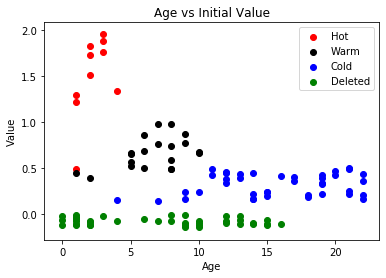

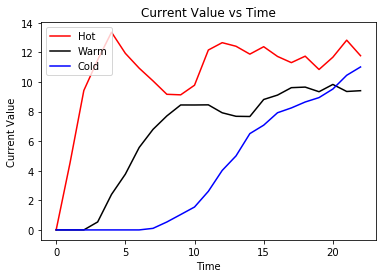

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

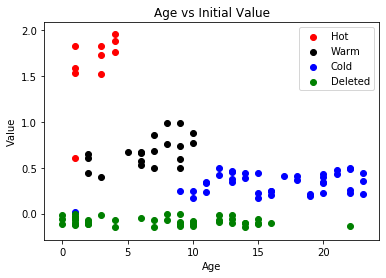

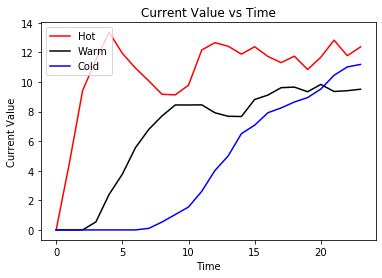

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

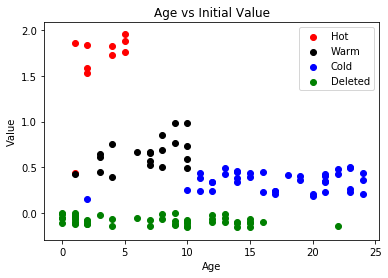

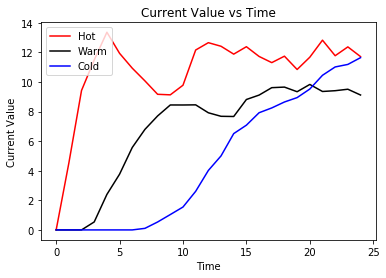

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

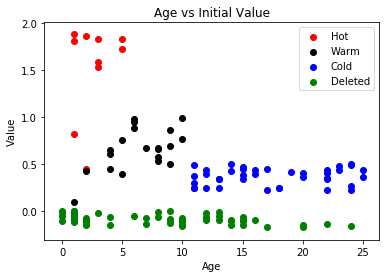

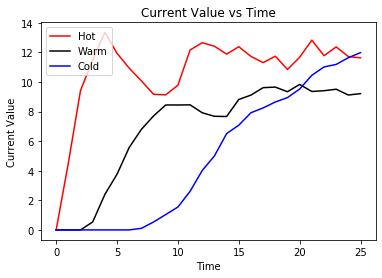

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

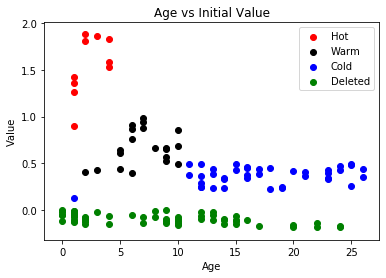

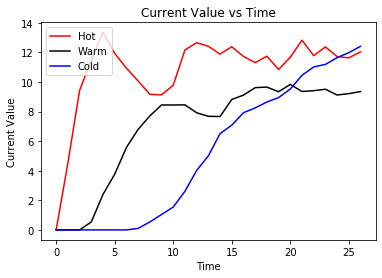

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

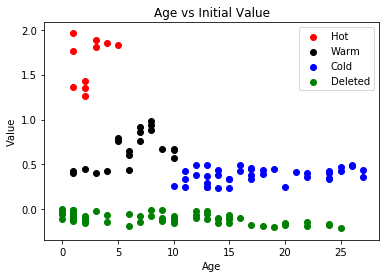

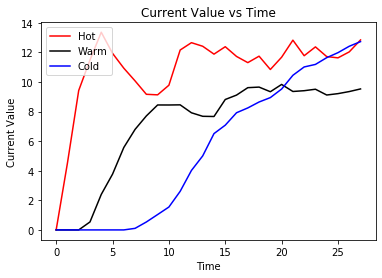

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

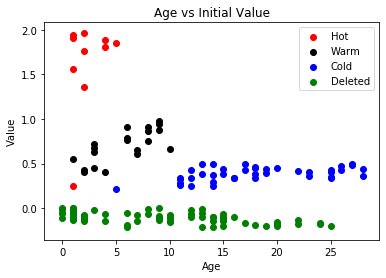

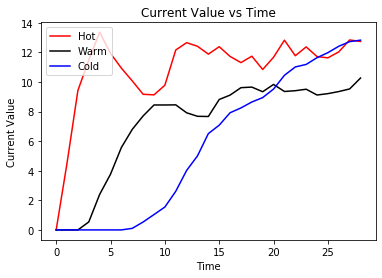

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

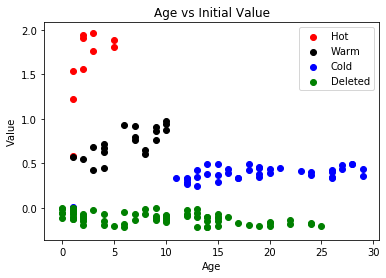

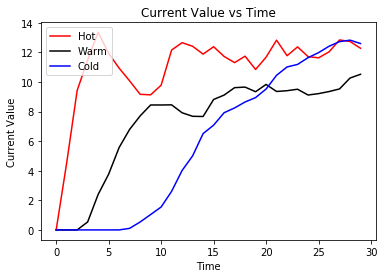

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

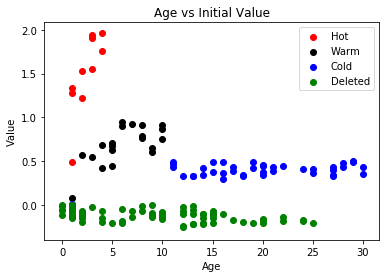

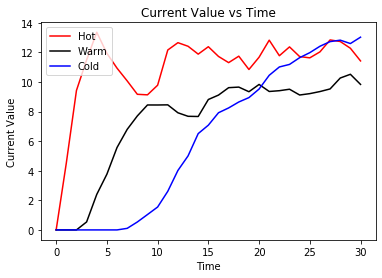

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

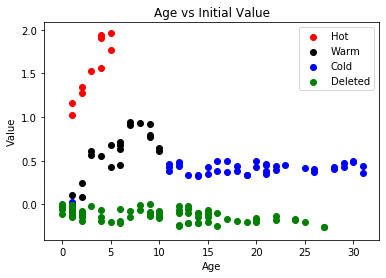

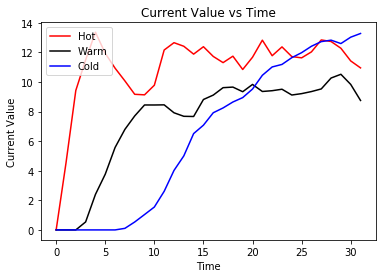

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

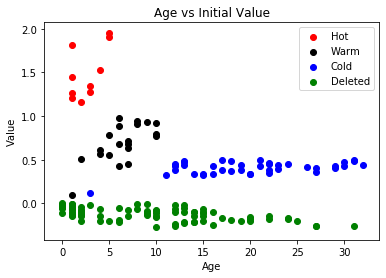

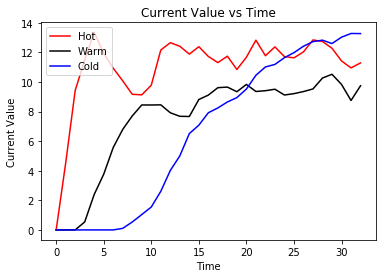

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

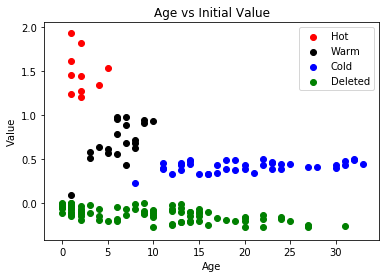

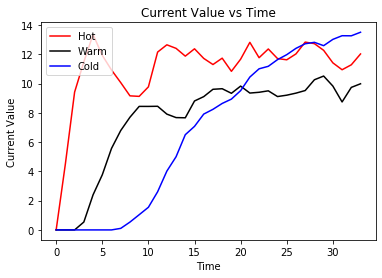

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

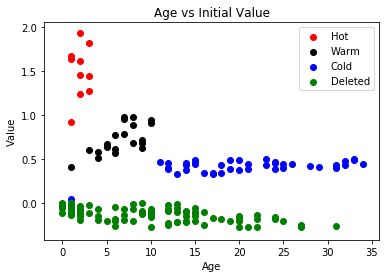

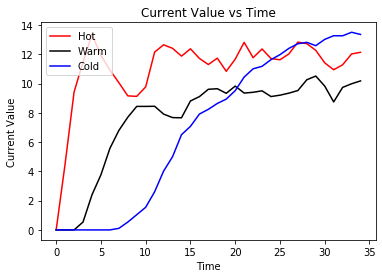

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

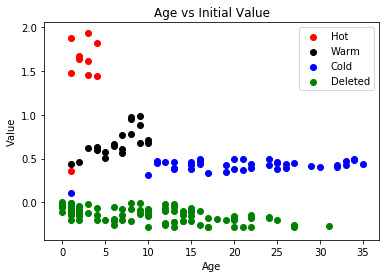

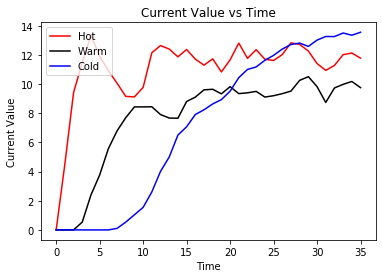

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

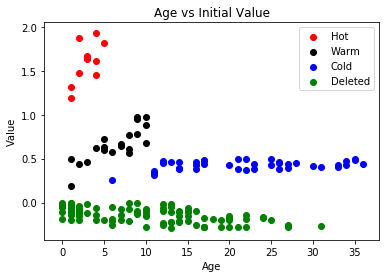

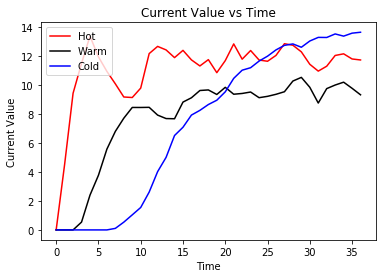

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

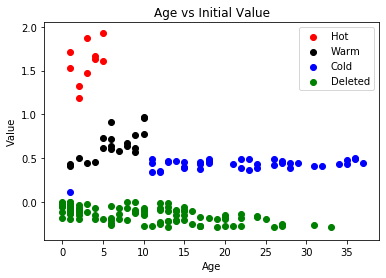

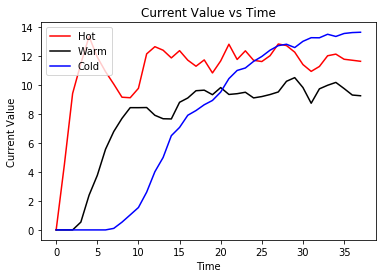

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

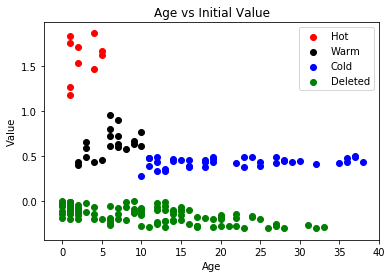

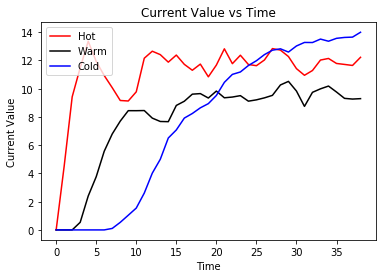

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

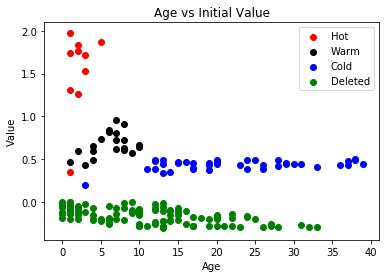

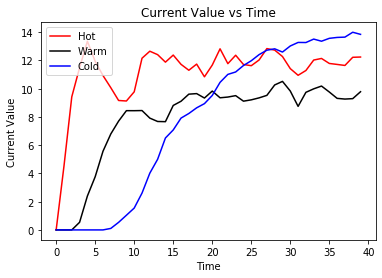

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

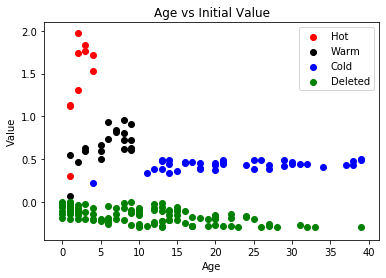

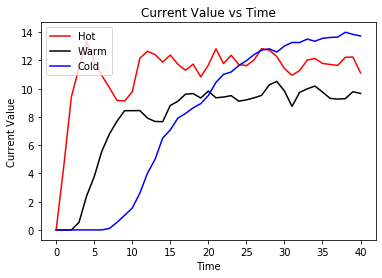

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

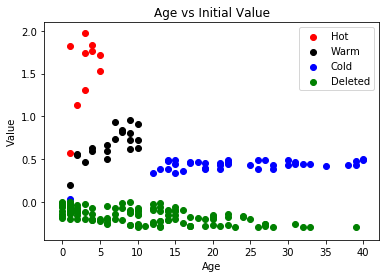

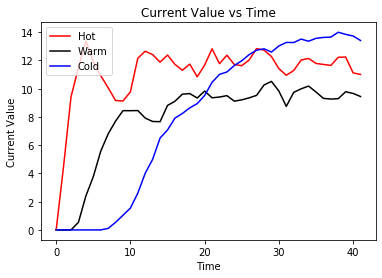

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

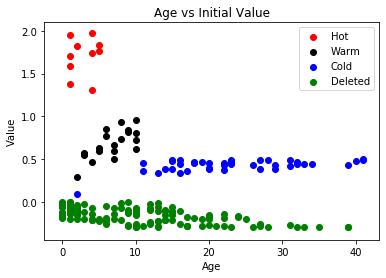

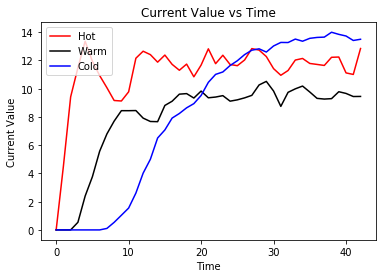

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

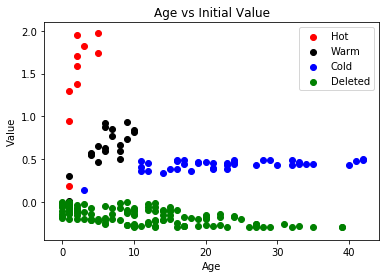

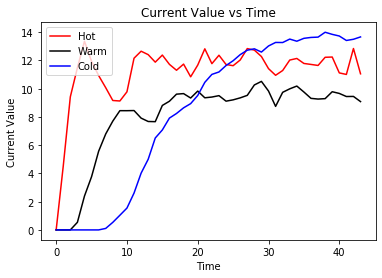

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

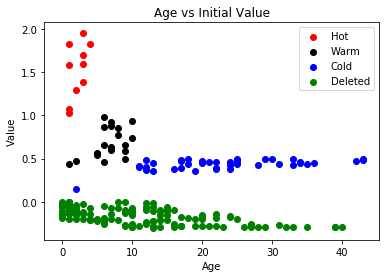

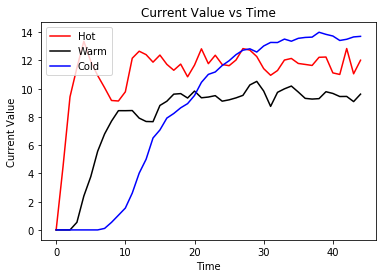

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

deldel [[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.115163

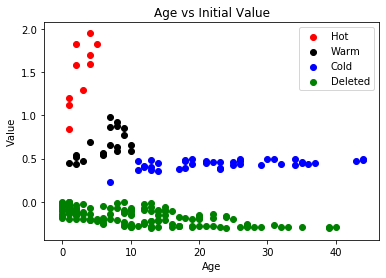

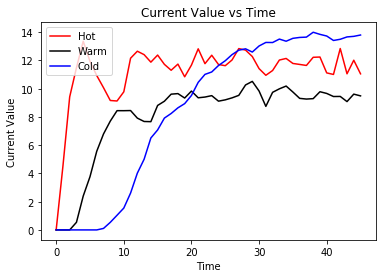

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

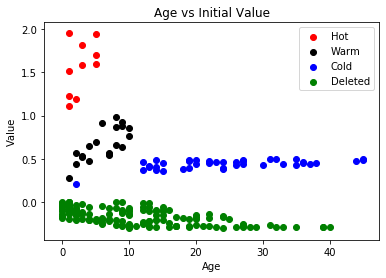

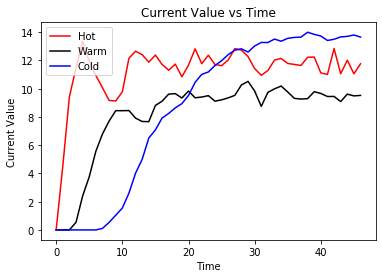

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

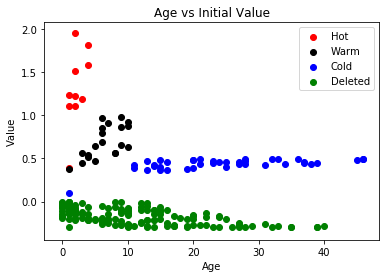

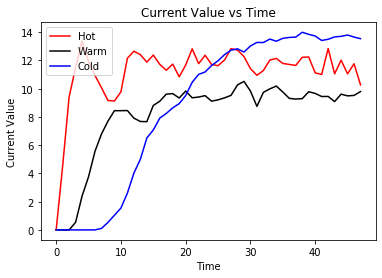

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

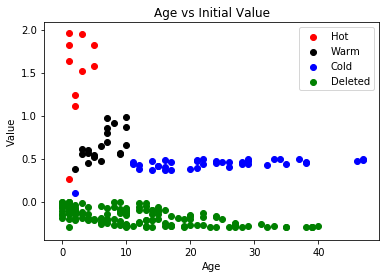

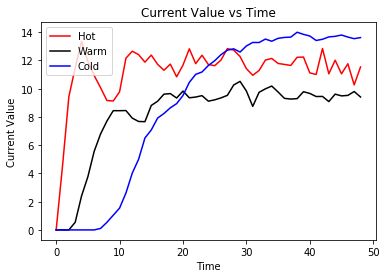

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

deldel [[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.115163

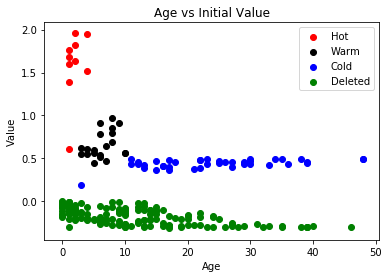

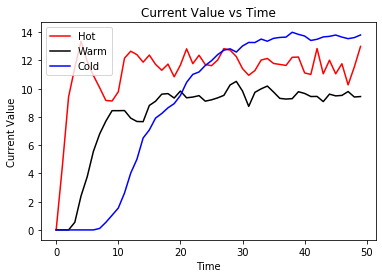

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

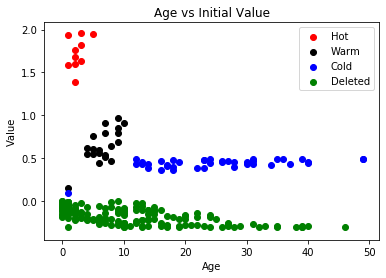

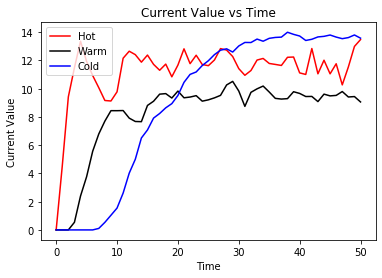

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Cold      Age  Key Terrain   Queries
0   38.0     0.872486  0.047160
1   19.0     0.962391  0.323937
2   40.0     0.988264  0.401542
3   37.0     0.981161  0.948606
4   18.0     0.815681  0.724411
5   27.0     0.942695  0.728531
6   11.0     0.909346  0.383142
7   31.0     0.913669  0.171831
8   24.0     0.953111  0.434636
9   17.0     0.933818  0.364892
10  14.0     0.919074  0.604139
11  25.0     0.979212  0.413897
12  15.0     0.767230  0.875751
13  25.0     0.881559  0.219779
14  32.0     0.878391  0.589662
15  29.0     0.791314  0.863859
16  14.0     0.879654  0.728893
17  28.0     0.927758  0.596356
18  41.0     0.923178  0.945257
19  27.0     0.904640  0.457307
20  24.0     0.972780  0.843271
21  17.0     0.738255  0.077815
22  20.0     0.908188  0.750372
23  15.0     0.857492  0.044473
24  13.0     0.869157  0.271579
25  50.0     0.996753  0.816835
26   1.0     0.085619  0.592597
27  36.0     0.983472  0.951830
28  32.0     0.980237  0.207730
29  41.0     0.896389  0.910192
30 

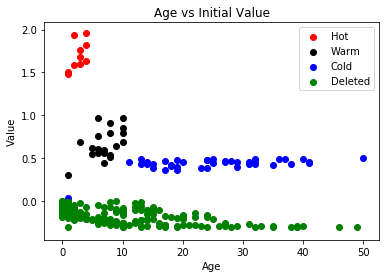

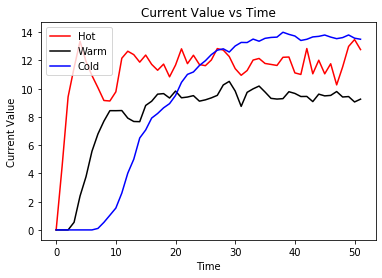

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

deldel [[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.115163

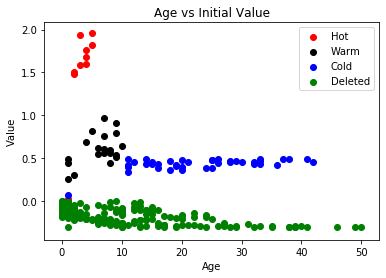

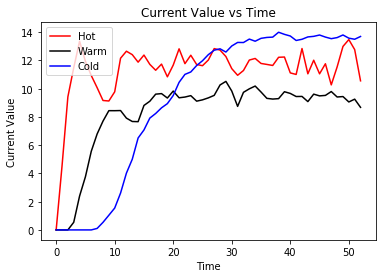

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

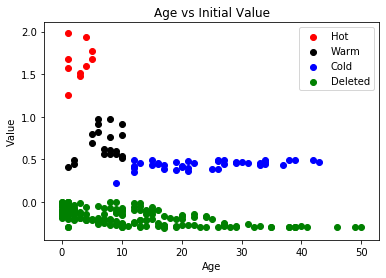

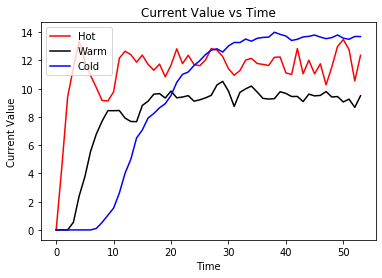

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

deldel [[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.115163

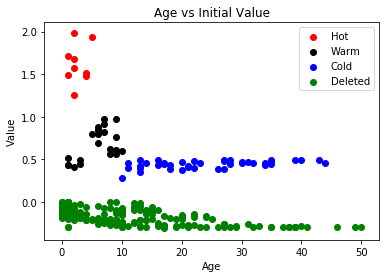

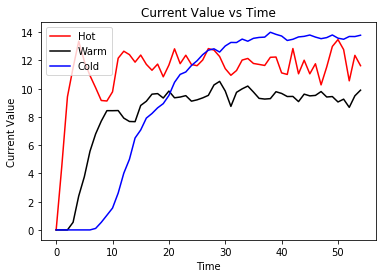

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

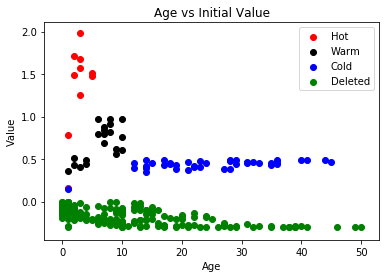

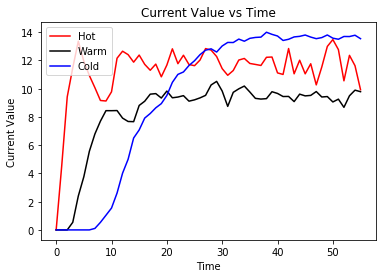

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

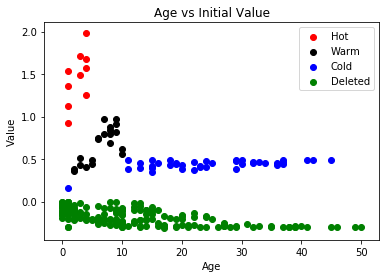

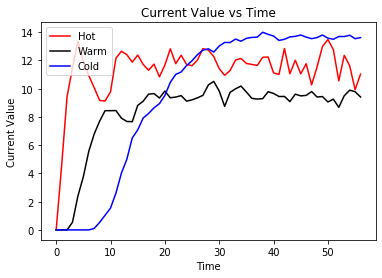

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

deldel [[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.115163

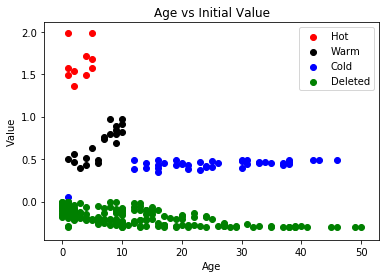

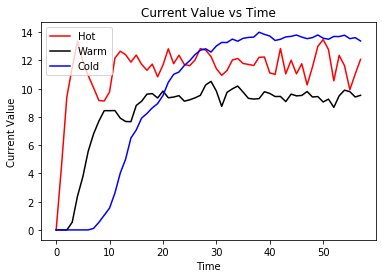

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

deldel [[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.115163

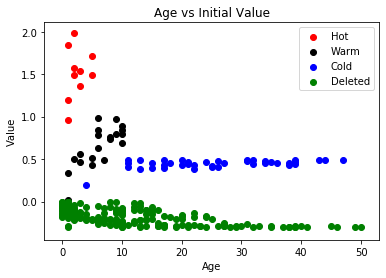

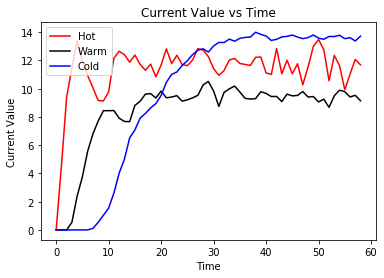

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

deldel [[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.115163

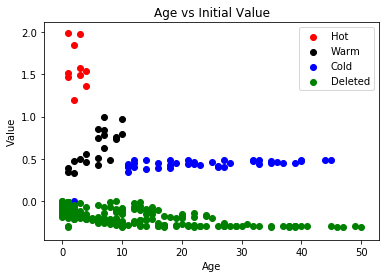

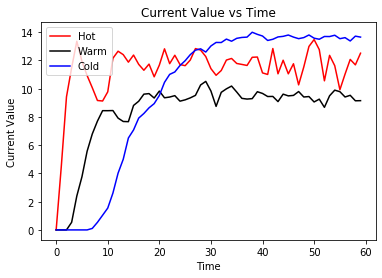

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

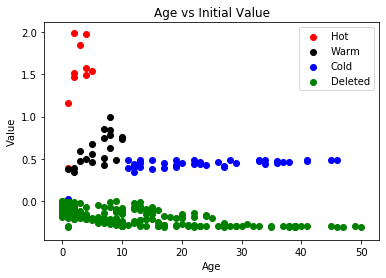

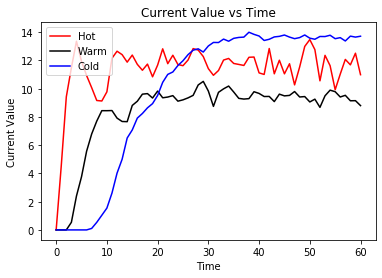

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Hot    Age  Key Terrain   Queries
0  1.0     0.908753  0.430261
1  3.0     0.990978  0.297350
2  3.0     0.735222  0.497707
3  5.0     0.787559  0.138586
4  1.0     0.641956  0.526275
5  1.0     0.310797  0.990820
6  2.0     0.582042  0.295759
7  4.0     0.922528  0.649623
8  5.0     0.989676  0.542727
9  3.0     0.757777  0.199386
Warm      Age  Key Terrain   Queries
0    8.0     0.742913  0.469487
1    9.0     0.787953  0.927134
2    8.0     0.858299  0.954568
3    4.0     0.598495  0.507967
4    9.0     0.626973  0.944776
5    1.0     0.162329  0.376095
6    6.0     0.766140  0.900397
7    8.0     0.510296  0.608623
8    6.0     0.678924  0.334127
9    2.0     0.376704  0.670976
10   9.0     0.836978  0.068699
11   4.0     0.478798  0.929716
12   3.0     0.347642  0.426886
13   5.0     0.746565  0.882980
14   6.0     0.464043  0.520329
15   5.0     0.500378  0.170745
16   9.0     0.989307  0.268705
17   6.0     0.559576  0.922595
18  10.0     0.490099  0.181709
19   3.0     0.391318

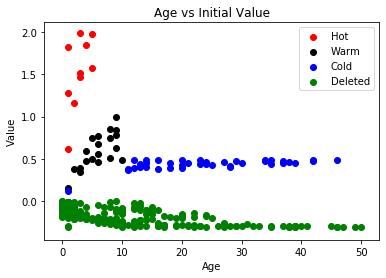

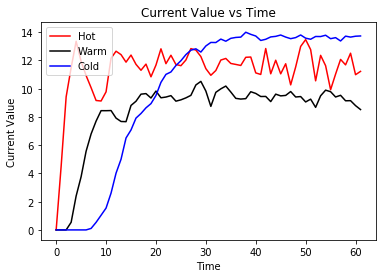

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Cold      Age  Key Terrain   Queries
0   19.0     0.909382  0.916199
1   30.0     0.962391  0.323937
2   13.0     0.968610  0.430937
3    2.0     0.310797  0.990820
4   29.0     0.815681  0.724411
5   38.0     0.942695  0.728531
6   22.0     0.909346  0.383142
7   12.0     0.754504  0.828294
8   35.0     0.953111  0.434636
9   28.0     0.933818  0.364892
10  25.0     0.919074  0.604139
11  36.0     0.979212  0.413897
12  14.0     0.800543  0.648187
13  36.0     0.881559  0.219779
14  12.0     0.738522  0.569311
15  21.0     0.973103  0.347236
16  25.0     0.879654  0.728893
17  39.0     0.927758  0.596356
18  15.0     0.814583  0.927125
19  38.0     0.904640  0.457307
20  35.0     0.972780  0.843271
21  15.0     0.908740  0.698869
22  31.0     0.908188  0.750372
23  26.0     0.857492  0.044473
24  24.0     0.869157  0.271579
25  21.0     0.849758  0.005087
26  14.0     0.883787  0.364427
27  47.0     0.983472  0.951830
28  43.0     0.980237  0.207730
29  21.0     0.796532  0.508349
30 

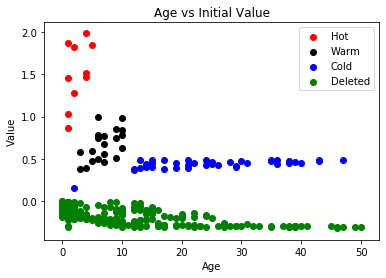

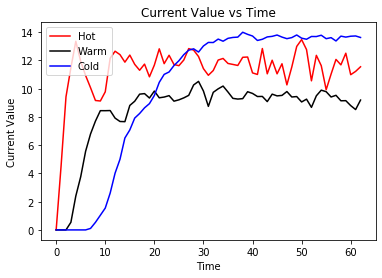

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warm      Age  Key Terrain   Queries
0   10.0     0.742913  0.469487
1    6.0     0.922528  0.649623
2   10.0     0.858299  0.954568
3    6.0     0.598495  0.507967
4    1.0     0.223747  0.888190
5    7.0     0.989676  0.542727
6    8.0     0.766140  0.900397
7   10.0     0.510296  0.608623
8    8.0     0.678924  0.334127
9    4.0     0.376704  0.670976
10   1.0     0.124952  0.726435
11   6.0     0.478798  0.929716
12   4.0     0.582042  0.295759
13   7.0     0.746565  0.882980
14   8.0     0.464043  0.520329
15   7.0     0.500378  0.170745
16   1.0     0.210515  0.397575
17   8.0     0.559576  0.922595
18   7.0     0.787559  0.138586
19   5.0     0.391318  0.244217
Cold      Age  Key Terrain   Queries
0   20.0     0.909382  0.916199
1   31.0     0.962391  0.323937
2   14.0     0.968610  0.430937
3   11.0     0.787953  0.927134
4   11.0     0.836978  0.068699
5   39.0     0.942695  0.728531
6   23.0     0.909346  0.383142
7   13.0     0.754504  0.828294
8   36.0     0.953111  0.43463

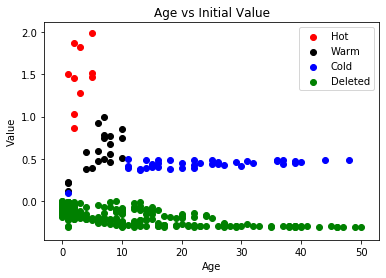

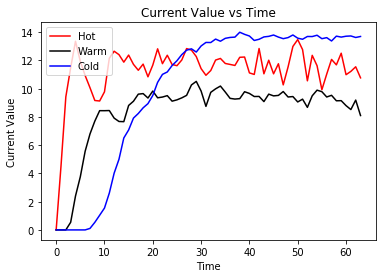

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warm     Age  Key Terrain   Queries
0   6.0     0.990978  0.297350
1   7.0     0.922528  0.649623
2   6.0     0.735222  0.497707
3   7.0     0.598495  0.507967
4   2.0     0.223747  0.888190
5   8.0     0.989676  0.542727
6   9.0     0.766140  0.900397
7   6.0     0.757777  0.199386
8   9.0     0.678924  0.334127
9   5.0     0.376704  0.670976
10  3.0     0.433048  0.208773
11  7.0     0.478798  0.929716
12  5.0     0.582042  0.295759
13  8.0     0.746565  0.882980
14  9.0     0.464043  0.520329
15  8.0     0.500378  0.170745
16  2.0     0.210515  0.397575
17  9.0     0.559576  0.922595
18  8.0     0.787559  0.138586
19  6.0     0.391318  0.244217
Cold      Age  Key Terrain   Queries
0   21.0     0.909382  0.916199
1   32.0     0.962391  0.323937
2   15.0     0.968610  0.430937
3   12.0     0.787953  0.927134
4   12.0     0.836978  0.068699
5   40.0     0.942695  0.728531
6   24.0     0.909346  0.383142
7   14.0     0.754504  0.828294
8   37.0     0.953111  0.434636
9   30.0     0.9338

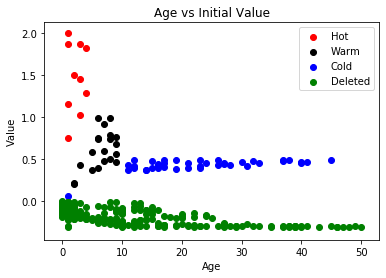

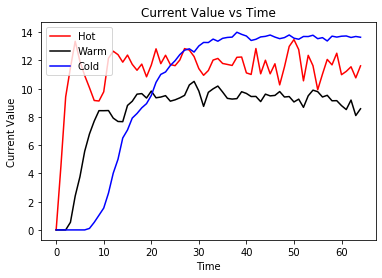

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Cold      Age  Key Terrain   Queries
0   22.0     0.909382  0.916199
1   33.0     0.962391  0.323937
2   16.0     0.968610  0.430937
3   13.0     0.787953  0.927134
4   13.0     0.836978  0.068699
5   41.0     0.942695  0.728531
6   25.0     0.909346  0.383142
7   15.0     0.754504  0.828294
8   38.0     0.953111  0.434636
9   31.0     0.933818  0.364892
10  28.0     0.919074  0.604139
11  39.0     0.979212  0.413897
12  17.0     0.800543  0.648187
13   6.0     0.376704  0.670976
14  15.0     0.738522  0.569311
15  24.0     0.973103  0.347236
16  28.0     0.879654  0.728893
17  42.0     0.927758  0.596356
18  18.0     0.814583  0.927125
19  41.0     0.904640  0.457307
20  38.0     0.972780  0.843271
21  18.0     0.908740  0.698869
22  34.0     0.908188  0.750372
23  29.0     0.857492  0.044473
24  27.0     0.869157  0.271579
25  24.0     0.849758  0.005087
26  17.0     0.883787  0.364427
27  12.0     0.858299  0.954568
28  46.0     0.980237  0.207730
29  24.0     0.796532  0.508349
30 

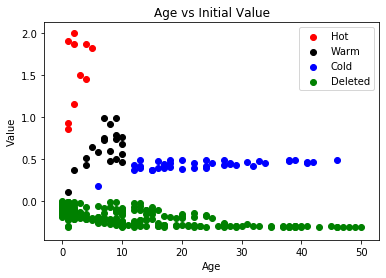

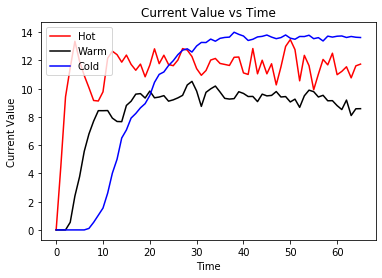

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

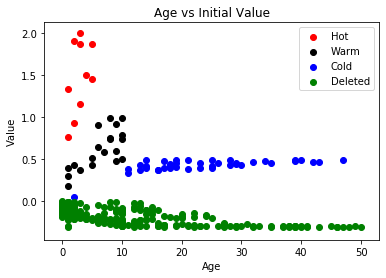

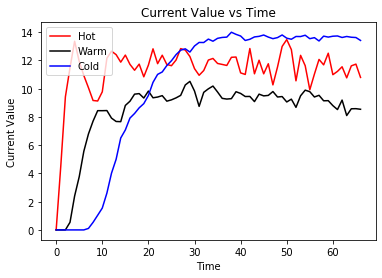

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

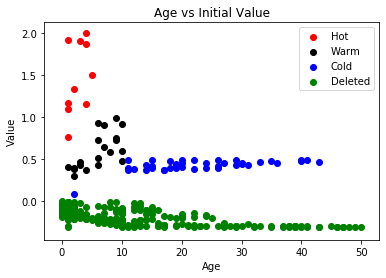

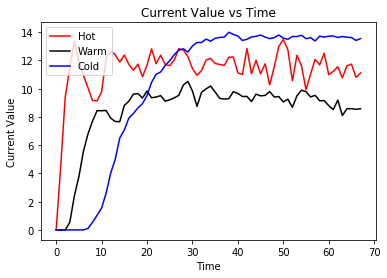

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

after Cold 40 0     25.0
1     36.0
2     19.0
3     16.0
4     16.0
5     44.0
6     28.0
7     18.0
8     41.0
9     34.0
10    31.0
11    42.0
12    20.0
13    13.0
14    18.0
15    27.0
16    31.0
17    12.0
18    21.0
19    12.0
20    41.0
21    21.0
22    37.0
23    32.0
24    30.0
25    27.0
26    20.0
27    15.0
28    11.0
29    27.0
30    19.0
31    30.0
32     1.0
33    16.0
34    21.0
35    15.0
36    23.0
37    12.0
38    25.0
39    20.0
Name: Age, dtype: float64
Hot    Age  Key Terrain   Queries
0  3.0     0.668908  0.574661
1  5.0     0.937136  0.812165
2  5.0     0.997636  0.668492
3  2.0     0.547866  0.789354
4  1.0     0.554999  0.036859
5  4.0     0.949741  0.308334
6  2.0     0.961164  0.337262
7  1.0     0.943238  0.955530
8  2.0     0.586206  0.117291
9  1.0     0.942034  0.933715
Warm      Age  Key Terrain   Queries
0   10.0     0.990978  0.297350
1    6.0     0.751223  0.803191
2   10.0     0.735222  0.497707
3    2.0     0.381151  0.283294
4    7.0     0.512589

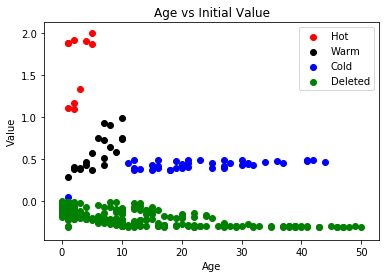

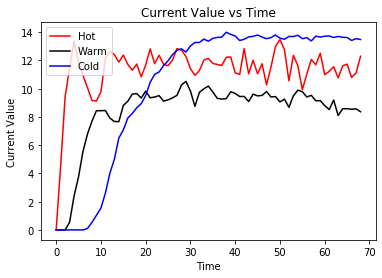

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Cold      Age  Key Terrain   Queries
0   26.0     0.909382  0.916199
1   37.0     0.962391  0.323937
2   20.0     0.968610  0.430937
3   17.0     0.787953  0.927134
4   17.0     0.836978  0.068699
5   11.0     0.735222  0.497707
6   29.0     0.909346  0.383142
7   19.0     0.754504  0.828294
8   42.0     0.953111  0.434636
9   35.0     0.933818  0.364892
10  32.0     0.919074  0.604139
11  43.0     0.979212  0.413897
12  21.0     0.800543  0.648187
13  14.0     0.766140  0.900397
14  19.0     0.738522  0.569311
15  28.0     0.973103  0.347236
16  32.0     0.879654  0.728893
17  13.0     0.746565  0.882980
18  22.0     0.814583  0.927125
19  13.0     0.787559  0.138586
20  42.0     0.972780  0.843271
21  22.0     0.908740  0.698869
22  38.0     0.908188  0.750372
23  33.0     0.857492  0.044473
24  31.0     0.869157  0.271579
25  28.0     0.849758  0.005087
26  21.0     0.883787  0.364427
27  16.0     0.858299  0.954568
28  12.0     0.922528  0.649623
29  11.0     0.757777  0.199386
30 

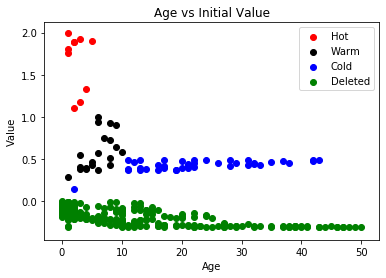

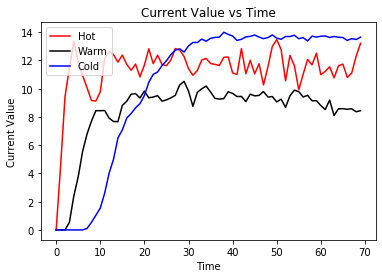

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

after Hot 10 0    5.0
1    2.0
2    2.0
3    2.0
4    3.0
5    1.0
6    4.0
7    3.0
8    1.0
9    3.0
Name: Age, dtype: float64
before Warm 0     6.0
1     7.0
2     6.0
3     3.0
4     8.0
5     8.0
6     9.0
7     0.0
8     5.0
9     4.0
10    8.0
11    3.0
12    5.0
13    8.0
14    3.0
15    4.0
16    3.0
17    6.0
18    5.0
19    9.0
Name: Age, dtype: float64
after Warm 20 0      7.0
1      8.0
2      7.0
3      4.0
4      9.0
5      9.0
6     10.0
7      1.0
8      6.0
9      5.0
10     9.0
11     4.0
12     6.0
13     9.0
14     4.0
15     5.0
16     4.0
17     7.0
18     6.0
19    10.0
Name: Age, dtype: float64
before Cold 0     26.0
1     37.0
2     20.0
3     17.0
4     17.0
5     11.0
6     29.0
7     19.0
8     42.0
9     35.0
10    32.0
11    43.0
12    21.0
13    14.0
14    19.0
15    28.0
16    32.0
17    13.0
18    22.0
19    13.0
20    42.0
21    22.0
22    38.0
23    33.0
24    31.0
25    28.0
26    21.0
27    16.0
28    12.0
29    11.0
30    20.0
31    31.0
32    11.

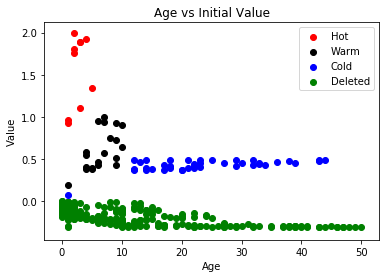

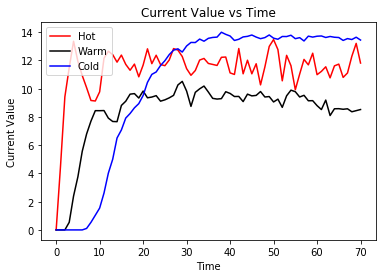

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

after Hot 10 0    1.0
1    3.0
2    3.0
3    3.0
4    1.0
5    1.0
6    5.0
7    4.0
8    1.0
9    4.0
Name: Age, dtype: float64
before Warm 0     7.0
1     8.0
2     7.0
3     4.0
4     9.0
5     9.0
6     5.0
7     1.0
8     6.0
9     5.0
10    1.0
11    4.0
12    6.0
13    9.0
14    4.0
15    5.0
16    4.0
17    7.0
18    6.0
19    3.0
Name: Age, dtype: float64
after Warm 20 0      8.0
1      9.0
2      8.0
3      5.0
4     10.0
5     10.0
6      6.0
7      2.0
8      7.0
9      6.0
10     2.0
11     5.0
12     7.0
13    10.0
14     5.0
15     6.0
16     5.0
17     8.0
18     7.0
19     4.0
Name: Age, dtype: float64
before Cold 0     27.0
1     38.0
2     21.0
3     18.0
4     18.0
5     12.0
6     30.0
7     20.0
8     43.0
9     36.0
10    33.0
11    44.0
12    22.0
13    15.0
14     0.0
15    29.0
16    33.0
17    14.0
18    23.0
19    14.0
20    43.0
21    23.0
22    39.0
23    34.0
24    32.0
25    29.0
26    22.0
27    17.0
28    13.0
29    12.0
30    21.0
31    32.0
32    12.

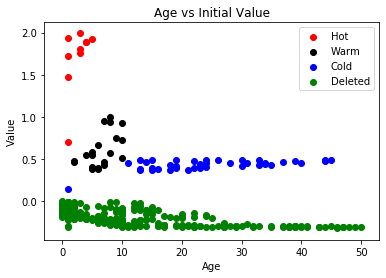

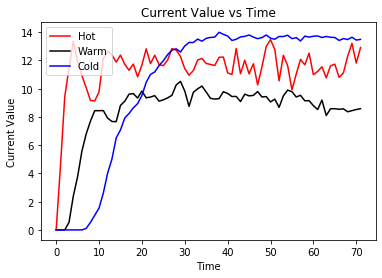

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

after Hot 10 0    2.0
1    4.0
2    4.0
3    4.0
4    2.0
5    1.0
6    1.0
7    1.0
8    2.0
9    1.0
Name: Age, dtype: float64
before Warm 0     8.0
1     9.0
2     8.0
3     5.0
4     5.0
5     1.0
6     6.0
7     2.0
8     7.0
9     4.0
10    2.0
11    5.0
12    7.0
13    4.0
14    5.0
15    0.0
16    5.0
17    8.0
18    7.0
19    4.0
Name: Age, dtype: float64
after Warm 20 0      9.0
1     10.0
2      9.0
3      6.0
4      6.0
5      2.0
6      7.0
7      3.0
8      8.0
9      5.0
10     3.0
11     6.0
12     8.0
13     5.0
14     6.0
15     1.0
16     6.0
17     9.0
18     8.0
19     5.0
Name: Age, dtype: float64
before Cold 0     28.0
1     39.0
2     22.0
3     19.0
4     19.0
5     13.0
6     31.0
7     21.0
8     44.0
9     37.0
10    34.0
11    45.0
12    23.0
13    16.0
14    10.0
15    30.0
16    34.0
17    15.0
18    24.0
19    15.0
20    44.0
21    24.0
22     6.0
23    10.0
24    33.0
25    30.0
26    23.0
27    18.0
28    14.0
29    13.0
30    22.0
31    33.0
32    13.

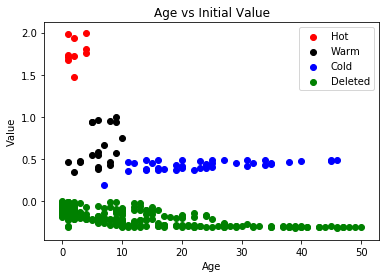

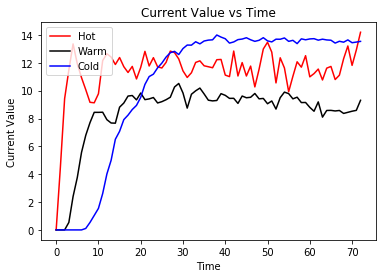

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

after Hot 10 0    3.0
1    1.0
2    5.0
3    1.0
4    3.0
5    2.0
6    2.0
7    2.0
8    3.0
9    2.0
Name: Age, dtype: float64
before Warm 0     9.0
1     4.0
2     9.0
3     0.0
4     6.0
5     2.0
6     7.0
7     3.0
8     4.0
9     5.0
10    3.0
11    6.0
12    8.0
13    5.0
14    0.0
15    1.0
16    6.0
17    9.0
18    8.0
19    5.0
Name: Age, dtype: float64
after Warm 20 0     10.0
1      5.0
2     10.0
3      1.0
4      7.0
5      3.0
6      8.0
7      4.0
8      5.0
9      6.0
10     4.0
11     7.0
12     9.0
13     6.0
14     1.0
15     2.0
16     7.0
17    10.0
18     9.0
19     6.0
Name: Age, dtype: float64
before Cold 0     29.0
1     40.0
2     23.0
3     20.0
4     20.0
5     14.0
6     32.0
7      6.0
8     45.0
9     38.0
10    35.0
11    46.0
12    24.0
13    17.0
14    11.0
15    31.0
16    35.0
17    16.0
18    25.0
19    16.0
20    45.0
21    25.0
22    10.0
23    11.0
24    34.0
25    31.0
26    24.0
27    19.0
28    15.0
29    14.0
30    23.0
31    34.0
32    14.

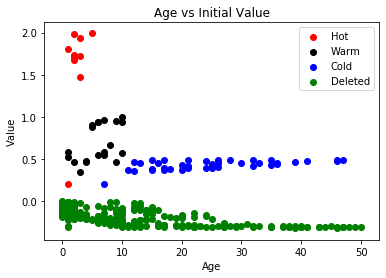

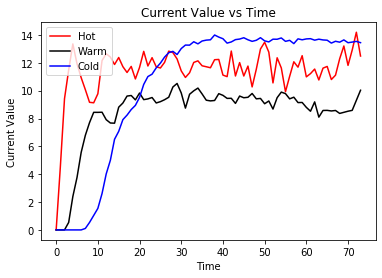

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Colds lowest value is 0.2617140580431658, BOUNCE 0
Warms lowest value is 0.06935738900863653, BOUNCE 0
Colds lowest value is 0.05179463886879873, BOUNCE 1
before Hot 0    3.0
1    0.0
2    0.0
3    1.0
4    3.0
5    2.0
6    2.0
7    2.0
8    3.0
9    2.0
Name: Age, dtype: float64
after Hot 10 0    4.0
1    1.0
2    1.0
3    2.0
4    4.0
5    3.0
6    3.0
7    3.0
8    4.0
9    3.0
Name: Age, dtype: float64
before Warm 0     5.0
1     5.0
2     0.0
3     1.0
4     7.0
5     3.0
6     8.0
7     4.0
8     5.0
9     6.0
10    4.0
11    7.0
12    9.0
13    6.0
14    1.0
15    2.0
16    7.0
17    0.0
18    9.0
19    6.0
Name: Age, dtype: float64
after Warm 20 0      6.0
1      6.0
2      1.0
3      2.0
4      8.0
5      4.0
6      9.0
7      5.0
8      6.0
9      7.0
10     5.0
11     8.0
12    10.0
13     7.0
14     2.0
15     3.0
16     8.0
17     1.0
18    10.0
19     7.0
Name: Age, dtype: float64
before Cold 0     3

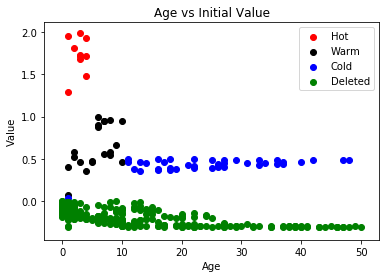

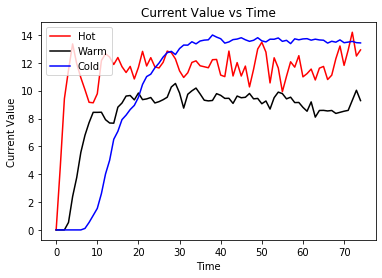

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Colds lowest value is 0.2104688162475272, BOUNCE 0
Warms lowest value is 0.06185736270368836, BOUNCE 0
Colds lowest value is 0.03827922841363599, BOUNCE 1
Warms lowest value is 0.2734674337742584, BOUNCE 0
Colds lowest value is 0.03092868135184418, BOUNCE 1
before Hot 0    4.0
1    1.0
2    1.0
3    2.0
4    0.0
5    3.0
6    3.0
7    3.0
8    4.0
9    3.0
Name: Age, dtype: float64
after Hot 10 0    5.0
1    2.0
2    2.0
3    3.0
4    1.0
5    4.0
6    4.0
7    4.0
8    5.0
9    4.0
Name: Age, dtype: float64
before Warm 0     6.0
1     6.0
2     0.0
3     2.0
4     8.0
5     4.0
6     9.0
7     5.0
8     6.0
9     7.0
10    5.0
11    8.0
12    4.0
13    7.0
14    2.0
15    3.0
16    8.0
17    1.0
18    0.0
19    7.0
Name: Age, dtype: float64
after Warm 20 0      7.0
1      7.0
2      1.0
3      3.0
4      9.0
5      5.0
6     10.0
7      6.0
8      7.0
9      8.0
10     6.0
11     9.0
12     5.0
13     8.0
14     3

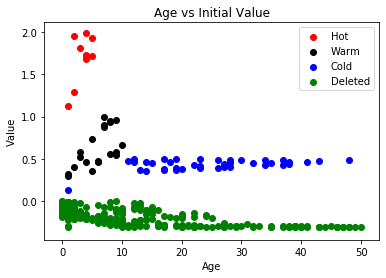

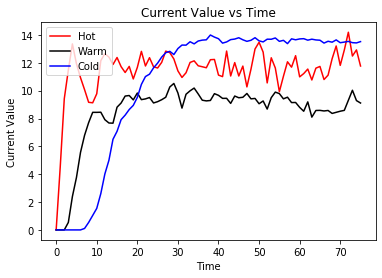

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is 0.28597971574407055, BOUNCE 0
Colds lowest value is 0.16795713103033366, BOUNCE 1
Warms lowest value is 0.30663402291934627, BOUNCE 0
Colds lowest value is 0.1490104834666473, BOUNCE 1
Warms lowest value is 0.34346663102298747, BOUNCE 0
Colds lowest value is 0.15977246457376465, BOUNCE 1
before Hot 0    0.0
1    0.0
2    2.0
3    3.0
4    0.0
5    4.0
6    4.0
7    4.0
8    0.0
9    0.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    1.0
2    3.0
3    4.0
4    1.0
5    5.0
6    5.0
7    5.0
8    1.0
9    1.0
Name: Age, dtype: float64
before Warm 0     7.0
1     7.0
2     2.0
3     3.0
4     9.0
5     5.0
6     5.0
7     6.0
8     7.0
9     8.0
10    4.0
11    9.0
12    5.0
13    8.0
14    3.0
15    4.0
16    9.0
17    2.0
18    1.0
19    8.0
Name: Age, dtype: float64
after Warm 20 0      8.0
1      8.0
2      3.0
3      4.0
4     10.0
5      6.0
6      6.0
7      7.0
8      8.0
9      9.0
10     5.0
11    10.0
12     6.0
13     9.0
14     4.0
15     5.0
16   

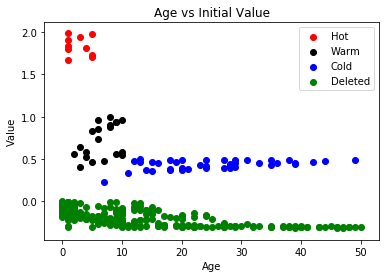

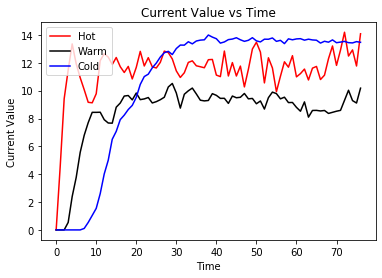

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is 0.3356600470155621, BOUNCE 0
Colds lowest value is 0.2650773201724017, BOUNCE 1
Warms lowest value is 0.26530479016976416, BOUNCE 0
Colds lowest value is 0.22400142470554543, BOUNCE 1
before Hot 0    1.0
1    1.0
2    3.0
3    4.0
4    1.0
5    0.0
6    0.0
7    0.0
8    1.0
9    1.0
Name: Age, dtype: float64
after Hot 10 0    2.0
1    2.0
2    4.0
3    5.0
4    2.0
5    1.0
6    1.0
7    1.0
8    2.0
9    2.0
Name: Age, dtype: float64
before Warm 0     8.0
1     8.0
2     3.0
3     4.0
4     5.0
5     6.0
6     6.0
7     0.0
8     8.0
9     9.0
10    5.0
11    5.0
12    6.0
13    9.0
14    4.0
15    5.0
16    5.0
17    3.0
18    2.0
19    9.0
Name: Age, dtype: float64
after Warm 20 0      9.0
1      9.0
2      4.0
3      5.0
4      6.0
5      7.0
6      7.0
7      1.0
8      9.0
9     10.0
10     6.0
11     6.0
12     7.0
13    10.0
14     5.0
15     6.0
16     6.0
17     4.0
18     3.0
19    10.0
Name: Age, dtype: float64
before Cold 0     33.0
1     44.0
2     

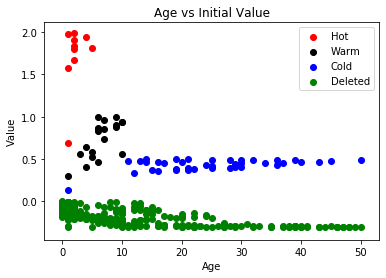

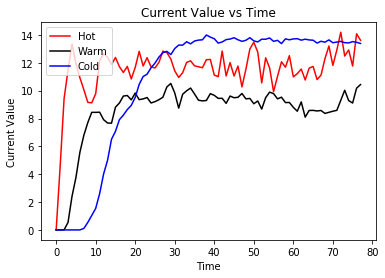

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.07504915909355292, BOUNCE 0
Colds lowest value is 0.2509655605696169, BOUNCE 1
Warms lowest value is 0.22070678706816427, BOUNCE 0
Colds lowest value is 0.03752457954677646, BOUNCE 1
before Hot 0    2.0
1    2.0
2    0.0
3    0.0
4    2.0
5    1.0
6    0.0
7    1.0
8    2.0
9    2.0
Name: Age, dtype: float64
after Hot 10 0    3.0
1    3.0
2    1.0
3    1.0
4    3.0
5    2.0
6    1.0
7    2.0
8    3.0
9    3.0
Name: Age, dtype: float64
before Warm 0     9.0
1     9.0
2     4.0
3     5.0
4     6.0
5     7.0
6     7.0
7     1.0
8     9.0
9     5.0
10    6.0
11    6.0
12    7.0
13    4.0
14    5.0
15    6.0
16    6.0
17    4.0
18    3.0
19    1.0
Name: Age, dtype: float64
after Warm 20 0     10.0
1     10.0
2      5.0
3      6.0
4      7.0
5      8.0
6      8.0
7      2.0
8     10.0
9      6.0
10     7.0
11     7.0
12     8.0
13     5.0
14     6.0
15     7.0
16     7.0
17     5.0
18     4.0
19  

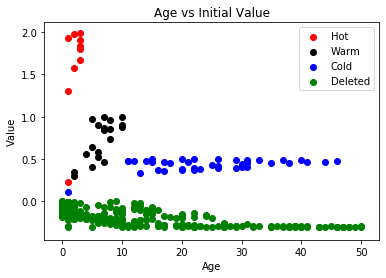

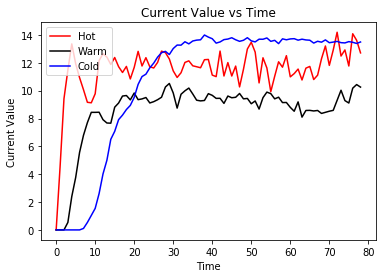

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.10833468572487279, BOUNCE 0
Colds lowest value is 0.2970979683561587, BOUNCE 1
Warms lowest value is 0.2690109942745992, BOUNCE 0
Colds lowest value is 0.056448073088223194, BOUNCE 1
before Hot 0    3.0
1    3.0
2    0.0
3    1.0
4    3.0
5    2.0
6    0.0
7    2.0
8    3.0
9    3.0
Name: Age, dtype: float64
after Hot 10 0    4.0
1    4.0
2    1.0
3    2.0
4    4.0
5    3.0
6    1.0
7    3.0
8    4.0
9    4.0
Name: Age, dtype: float64
before Warm 0     1.0
1     0.0
2     5.0
3     6.0
4     7.0
5     8.0
6     8.0
7     0.0
8     0.0
9     6.0
10    7.0
11    7.0
12    8.0
13    5.0
14    6.0
15    7.0
16    7.0
17    5.0
18    4.0
19    2.0
Name: Age, dtype: float64
after Warm 20 0     2.0
1     1.0
2     6.0
3     7.0
4     8.0
5     9.0
6     9.0
7     1.0
8     1.0
9     7.0
10    8.0
11    8.0
12    9.0
13    6.0
14    7.0
15    8.0
16    8.0
17    6

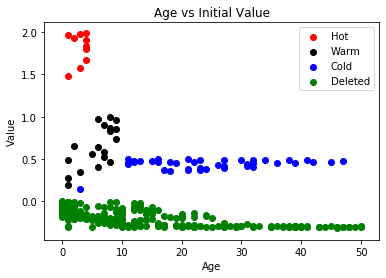

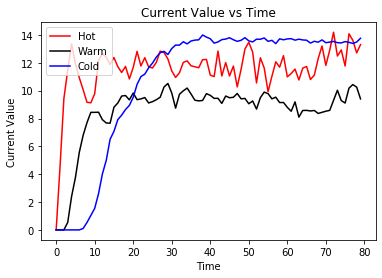

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is 0.1876769477512021, BOUNCE 0
Colds lowest value is 0.1446100269992517, BOUNCE 1
Colds lowest value is nan, BOUNCE 0
Warms lowest value is 0.1324907360933456, BOUNCE 0
Colds lowest value is 0.134494271217324, BOUNCE 1
Warms lowest value is 0.07285682776171332, BOUNCE 0
Colds lowest value is 0.0662453680466728, BOUNCE 1
before Hot 0    4.0
1    4.0
2    1.0
3    2.0
4    0.0
5    3.0
6    1.0
7    0.0
8    4.0
9    4.0
Name: Age, dtype: float64
after Hot 10 0    5.0
1    5.0
2    2.0
3    3.0
4    1.0
5    4.0
6    2.0
7    1.0
8    5.0
9    5.0
Name: Age, dtype: float64
before Warm 0     2.0
1     3.0
2     6.0
3     7.0
4     8.0
5     9.0
6     9.0
7     4.0
8     1.0
9     7.0
10    8.0
11    8.0
12    9.0
13    6.0
14    7.0
15    8.0
16    8.0
17    6.0
18    5.0
19    3.0
Name: Age, dtype: float64
after Warm 20 0      3.0
1      4.0
2      7.0
3      8.0
4      9.0
5     10.0
6     10.0
7      5.0
8      2.0
9      8.0
10     9.0
11     9.0
12    10.0
13     

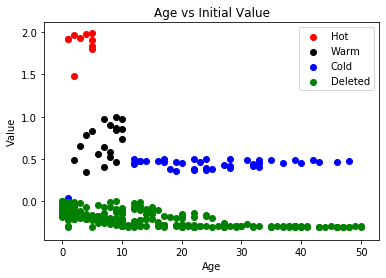

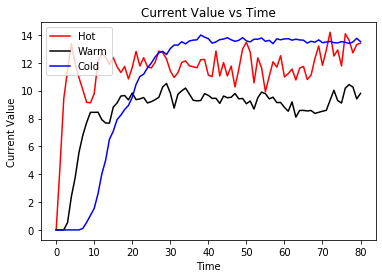

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is 0.28201344802107353, BOUNCE 0
Colds lowest value is 0.1646397417814975, BOUNCE 1
before Hot 0    0.0
1    0.0
2    2.0
3    3.0
4    1.0
5    4.0
6    2.0
7    1.0
8    0.0
9    0.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    1.0
2    3.0
3    4.0
4    2.0
5    5.0
6    3.0
7    2.0
8    1.0
9    1.0
Name: Age, dtype: float64
before Warm 0     3.0
1     4.0
2     7.0
3     8.0
4     9.0
5     5.0
6     5.0
7     5.0
8     2.0
9     8.0
10    9.0
11    9.0
12    5.0
13    7.0
14    8.0
15    9.0
16    9.0
17    0.0
18    6.0
19    5.0
Name: Age, dtype: float64
after Warm 20 0      4.0
1      5.0
2      8.0
3      9.0
4     10.0
5      6.0
6      6.0
7      6.0
8      3.0
9      9.0
10    10.0
11    10.0
12     6.0
13     8.0
14     9.0
15    10.0
16    10.0
17     1.0
18     7.0
19     6.0
Name: Age, dtype: float64
before Cold 0     37.0
1     48.0
2     31.0
3     28.0
4     28.0
5     22.0
6     40.0
7     17.0
8     17.0
9      7.0
10    43.0
11    12.0

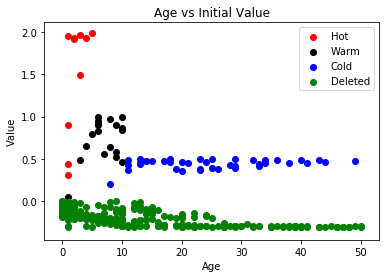

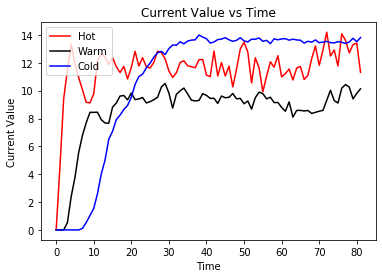

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
before Hot 0    0.0
1    0.0
2    0.0
3    4.0
4    2.0
5    0.0
6    3.0
7    2.0
8    0.0
9    1.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    1.0
2    1.0
3    5.0
4    3.0
5    1.0
6    4.0
7    3.0
8    1.0
9    2.0
Name: Age, dtype: float64
before Warm 0     4.0
1     5.0
2     8.0
3     9.0
4     5.0
5     6.0
6     6.0
7     6.0
8     3.0
9     9.0
10    1.0
11    1.0
12    6.0
13    8.0
14    9.0
15    1.0
16    3.0
17    1.0
18    7.0
19    6.0
Name: Age, dtype: float64
after Warm 20 0      5.0
1      6.0
2      9.0
3     10.0
4      6.0
5      7.0
6      7.0
7      7.0
8      4.0
9     10.0
10     2.0
11     2.0
12     7.0
13     9.0
14    10.0
15     2.0
16     4.0
17     2.0
18     8.0
19     7.0
Name: Age, dtype: float64
before Cold 0     38.0
1     10.0
2     32.0
3     10.0
4     29.0
5     10.0
6     41.0
7     18.0
8 

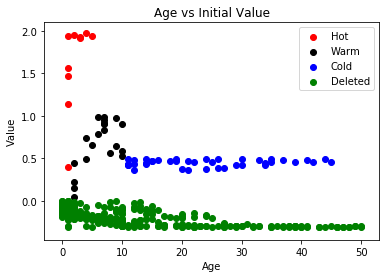

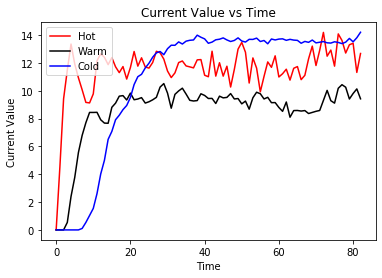

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
before Hot 0    0.0
1    1.0
2    0.0
3    0.0
4    3.0
5    1.0
6    4.0
7    3.0
8    1.0
9    2.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    2.0
2    1.0
3    1.0
4    4.0
5    2.0
6    5.0
7    4.0
8    2.0
9    3.0
Name: Age, dtype: float64
before Warm 0     5.0
1     6.0
2     9.0
3     5.0
4     6.0
5     7.0
6     7.0
7     7.0
8     4.0
9     1.0
10    2.0
11    2.0
12    7.0
13    9.0
14    1.0
15    2.0
16    4.0
17    2.0
18    8.0
19    7.0
Name: Age, dtype: float64
after Warm 20 0      6.0
1      7.0
2     10.0
3      6.0
4      7.0
5      8.0
6      8.0
7      8.0
8      5.0
9      2.0
10     3.0
11     3.0
12     8.0
13    10.0
14     2.0
15     3.0
16     5.0
17     3.0
18     9.0
19     8.0
Name: Age, dtype: float64
before Cold 0     39.0
1     11.0
2     33.0
3     11.0
4     30.0
5     11.0
6     42.0
7     19.0
8     19.0
9     11.0
10    10.0
11    14.0
12    14.0
13    10.0
14    21

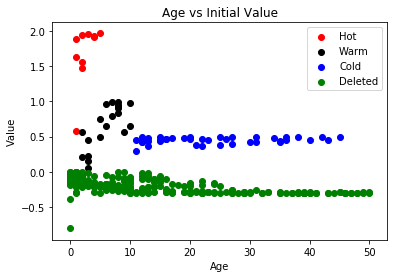

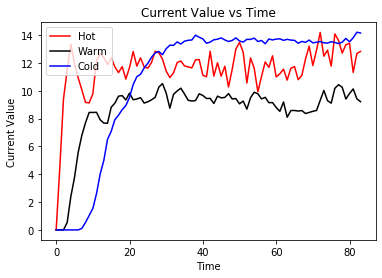

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.04249656310941487, BOUNCE 0
Colds lowest value is 0.29190088281483534, BOUNCE 1
Warms lowest value is 0.13324125181338717, BOUNCE 0
Colds lowest value is 0.024046871373962466, BOUNCE 1
Warms lowest value is 0.18313353672505256, BOUNCE 0
Colds lowest value is 0.0753951616231391, BOUNCE 1
before Hot 0    0.0
1    2.0
2    1.0
3    1.0
4    4.0
5    2.0
6    0.0
7    4.0
8    0.0
9    3.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    3.0
2    2.0
3    2.0
4    5.0
5    3.0
6    1.0
7    5.0
8    1.0
9    4.0
Name: Age, dtype: float64
before Warm 0     6.0
1     7.0
2     5.0
3     6.0
4     7.0
5     8.0
6     8.0
7     8.0
8     5.0
9     0.0
10    0.0
11    3.0
12    8.0
13    1.0
14    2.0
15    3.0
16    5.0
17    2.0
18    9.0
19    8.0
Name: Age, dtype: float64
after Warm 20 0      7.0
1      8.0
2      6.0
3      7.0
4      8.0
5      9.0
6      9.0
7      9.0
8      6.0
9      1.0
10     1.0
11     4.0
12     9.0
1

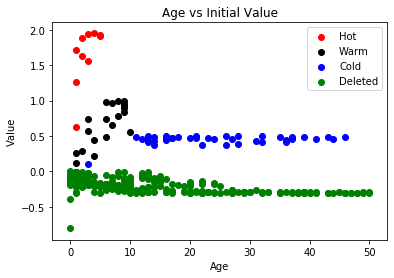

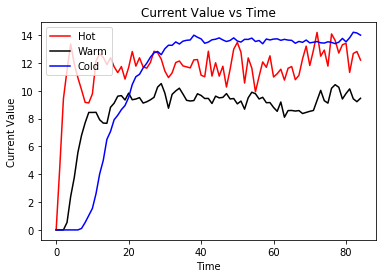

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is 0.18158253958825954, BOUNCE 0
Colds lowest value is 0.05774012806804967, BOUNCE 1
Warms lowest value is 0.24334187196713372, BOUNCE 0
Colds lowest value is 0.10707558291550812, BOUNCE 1
Warms lowest value is 0.23047016791454888, BOUNCE 0
Colds lowest value is 0.12679392276182233, BOUNCE 1
before Hot 0    1.0
1    3.0
2    2.0
3    2.0
4    0.0
5    3.0
6    1.0
7    0.0
8    0.0
9    4.0
Name: Age, dtype: float64
after Hot 10 0    2.0
1    4.0
2    3.0
3    3.0
4    1.0
5    4.0
6    2.0
7    1.0
8    1.0
9    5.0
Name: Age, dtype: float64
before Warm 0     7.0
1     8.0
2     6.0
3     7.0
4     8.0
5     9.0
6     9.0
7     9.0
8     6.0
9     5.0
10    0.0
11    1.0
12    9.0
13    2.0
14    3.0
15    4.0
16    6.0
17    3.0
18    5.0
19    9.0
Name: Age, dtype: float64
after Warm 20 0      8.0
1      9.0
2      7.0
3      8.0
4      9.0
5     10.0
6     10.0
7     10.0
8      7.0
9      6.0
10     1.0
11     2.0
12    10.0
13     3.0
14     4.0
15     5.0
16  

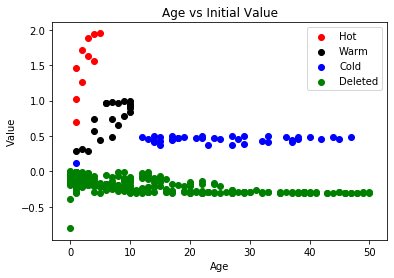

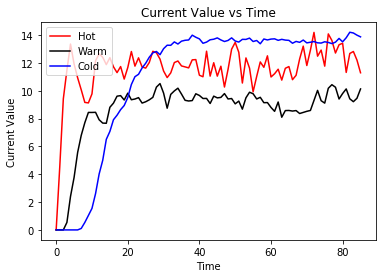

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
before Hot 0    2.0
1    4.0
2    3.0
3    3.0
4    1.0
5    4.0
6    2.0
7    0.0
8    0.0
9    0.0
Name: Age, dtype: float64
after Hot 10 0    3.0
1    5.0
2    4.0
3    4.0
4    2.0
5    5.0
6    3.0
7    1.0
8    1.0
9    1.0
Name: Age, dtype: float64
before Warm 0     8.0
1     9.0
2     7.0
3     8.0
4     9.0
5     5.0
6     0.0
7     1.0
8     7.0
9     6.0
10    1.0
11    2.0
12    0.0
13    3.0
14    4.0
15    5.0
16    7.0
17    4.0
18    6.0
19    1.0
Name: Age, dtype: float64
after Warm 20 0      9.0
1     10.0
2      8.0
3      9.0
4     10.0
5      6.0
6      1.0
7      2.0
8      8.0
9      7.0
10     2.0
11     3.0
12     1.0
13     4.0
14     5.0
15     6.0
16     8.0
17     5.0
18     7.0
19     2.0
Name: Age, dtype: float64
before Cold 0     42.0
1     14.0
2     36.0
3     14.0
4     33.0
5     14.0
6     10.0
7     22.0
8 

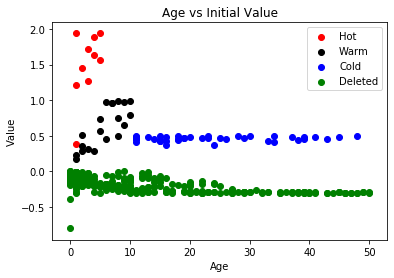

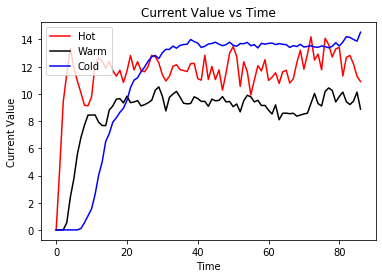

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is 0.1622293648062146, BOUNCE 0
Colds lowest value is 0.2973585340421813, BOUNCE 1
Warms lowest value is 0.012362559912545312, BOUNCE 0
Colds lowest value is 0.0845300374516592, BOUNCE 1
Warms lowest value is 0.08738568756919718, BOUNCE 0
Colds lowest value is 0.006181279956272656, BOUNCE 1
before Hot 0    3.0
1    0.0
2    4.0
3    4.0
4    2.0
5    0.0
6    3.0
7    0.0
8    1.0
9    1.0
Name: Age, dtype: float64
after Hot 10 0    4.0
1    1.0
2    5.0
3    5.0
4    3.0
5    1.0
6    4.0
7    1.0
8    2.0
9    2.0
Name: Age, dtype: float64
before Warm 0     9.0
1     5.0
2     8.0
3     9.0
4     5.0
5     6.0
6     1.0
7     2.0
8     8.0
9     7.0
10    2.0
11    3.0
12    1.0
13    4.0
14    5.0
15    6.0
16    8.0
17    5.0
18    7.0
19    2.0
Name: Age, dtype: float64
after Warm 20 0     10.0
1      6.0
2      9.0
3     10.0
4      6.0
5      7.0
6      2.0
7      3.0
8      9.0
9      8.0
10     3.0
11     4.0
12     2.0
13     5.0
14     6.0
15     7.0
16   

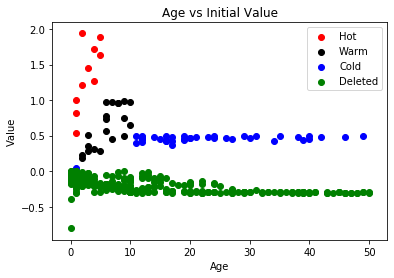

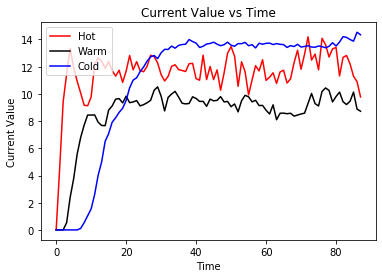

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is 0.17075615484918205, BOUNCE 0
Colds lowest value is 0.29860036509511667, BOUNCE 1
Warms lowest value is 0.20150626618150544, BOUNCE 0
Colds lowest value is 0.09271917305688827, BOUNCE 1
Warms lowest value is 0.22409799253444285, BOUNCE 0
Colds lowest value is 0.10941622796924846, BOUNCE 1
before Hot 0    4.0
1    0.0
2    0.0
3    0.0
4    3.0
5    1.0
6    4.0
7    0.0
8    2.0
9    2.0
Name: Age, dtype: float64
after Hot 10 0    5.0
1    1.0
2    1.0
3    1.0
4    4.0
5    2.0
6    5.0
7    1.0
8    3.0
9    3.0
Name: Age, dtype: float64
before Warm 0     5.0
1     6.0
2     9.0
3     5.0
4     6.0
5     7.0
6     1.0
7     3.0
8     9.0
9     8.0
10    3.0
11    4.0
12    0.0
13    1.0
14    6.0
15    7.0
16    9.0
17    6.0
18    8.0
19    3.0
Name: Age, dtype: float64
after Warm 20 0      6.0
1      7.0
2     10.0
3      6.0
4      7.0
5      8.0
6      2.0
7      4.0
8     10.0
9      9.0
10     4.0
11     5.0
12     1.0
13     2.0
14     7.0
15     8.0
16  

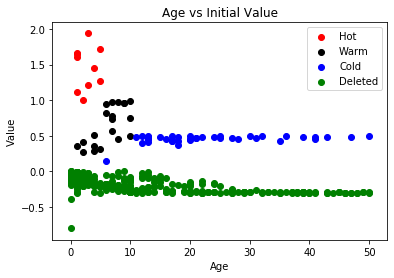

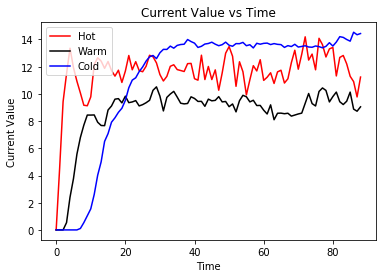

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.23436007490109945, BOUNCE 0
Colds lowest value is 0.3009211980644043, BOUNCE 1
Warms lowest value is 0.24442258572264886, BOUNCE 0
Colds lowest value is 0.13819743731450634, BOUNCE 1
before Hot 0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
5    0.0
6    0.0
7    1.0
8    3.0
9    0.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    2.0
2    2.0
3    2.0
4    1.0
5    1.0
6    1.0
7    2.0
8    4.0
9    1.0
Name: Age, dtype: float64
before Warm 0     6.0
1     7.0
2     5.0
3     6.0
4     7.0
5     8.0
6     4.0
7     4.0
8     5.0
9     9.0
10    3.0
11    5.0
12    1.0
13    2.0
14    7.0
15    8.0
16    2.0
17    7.0
18    9.0
19    4.0
Name: Age, dtype: float64
after Warm 20 0      7.0
1      8.0
2      6.0
3      7.0
4      8.0
5      9.0
6      5.0
7      5.0
8      6.0
9     10.0
10     4.0
11     6.0
12     2.0
13     3.0
14     8.0
15     9.0
16     3.0
17     8.0
18    10.0
19     5.0
Name: Age, dtype: float64
bef

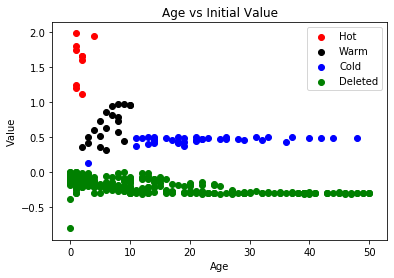

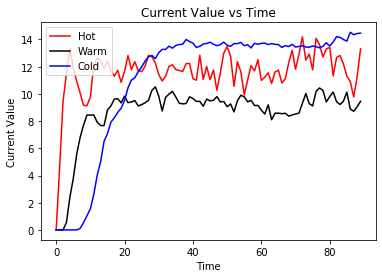

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.04730950418368973, BOUNCE 0
Colds lowest value is 0.3003435015129787, BOUNCE 1
Warms lowest value is 0.23275848033194824, BOUNCE 0
Colds lowest value is 0.023654752091844866, BOUNCE 1
Warms lowest value is 0.24123688242864993, BOUNCE 0
Colds lowest value is 0.14905448667849833, BOUNCE 1
before Hot 0    1.0
1    2.0
2    0.0
3    2.0
4    1.0
5    1.0
6    0.0
7    2.0
8    4.0
9    1.0
Name: Age, dtype: float64
after Hot 10 0    2.0
1    3.0
2    1.0
3    3.0
4    2.0
5    2.0
6    1.0
7    3.0
8    5.0
9    2.0
Name: Age, dtype: float64
before Warm 0     7.0
1     8.0
2     6.0
3     7.0
4     8.0
5     9.0
6     5.0
7     5.0
8     6.0
9     2.0
10    4.0
11    0.0
12    2.0
13    3.0
14    8.0
15    9.0
16    3.0
17    8.0
18    1.0
19    5.0
Name: Age, dtype: float64
after Warm 20 0      8.0
1      9.0
2      7.0
3      8.0
4      9.0
5     10.0
6      6.0
7      6.0
8      7.0
9      3.

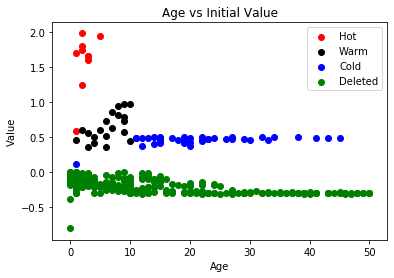

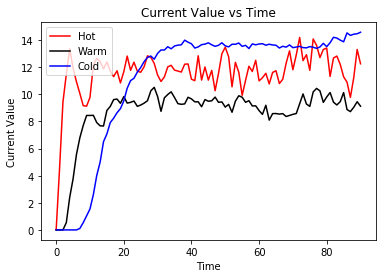

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.25802895007794385, BOUNCE 0
Colds lowest value is 0.2030727994701125, BOUNCE 1
Warms lowest value is 0.2784724065351213, BOUNCE 0
Colds lowest value is 0.16523725643512352, BOUNCE 1
Warms lowest value is 0.10842550155516406, BOUNCE 0
Colds lowest value is 0.14509878024724743, BOUNCE 1
before Hot 0    0.0
1    3.0
2    1.0
3    3.0
4    2.0
5    2.0
6    0.0
7    3.0
8    0.0
9    2.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    4.0
2    2.0
3    4.0
4    3.0
5    3.0
6    1.0
7    4.0
8    1.0
9    3.0
Name: Age, dtype: float64
before Warm 0     8.0
1     9.0
2     7.0
3     8.0
4     9.0
5     5.0
6     6.0
7     2.0
8     7.0
9     3.0
10    5.0
11    1.0
12    3.0
13    4.0
14    9.0
15    0.0
16    4.0
17    9.0
18    2.0
19    6.0
Name: Age, dtype: float64
after Warm 20 0      9.0
1     10.0
2      8.0
3      9.0
4     10.0
5      6.0
6      7.0
7      3.0
8      8.0
9      4.0
10     6.0
11     2.0
12     4.0
13 

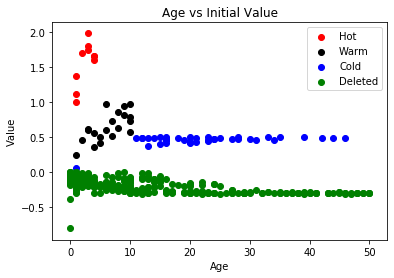

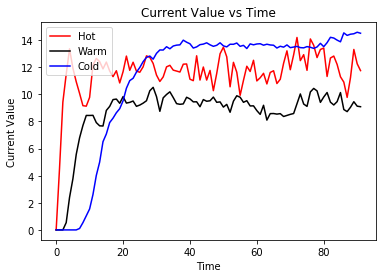

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.04413072065937895, BOUNCE 0
Colds lowest value is 0.3175389136077061, BOUNCE 1
before Hot 0    0.0
1    4.0
2    2.0
3    4.0
4    3.0
5    3.0
6    1.0
7    4.0
8    0.0
9    3.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    5.0
2    3.0
3    5.0
4    4.0
5    4.0
6    2.0
7    5.0
8    1.0
9    4.0
Name: Age, dtype: float64
before Warm 0     9.0
1     1.0
2     8.0
3     9.0
4     1.0
5     6.0
6     7.0
7     3.0
8     8.0
9     4.0
10    6.0
11    2.0
12    4.0
13    5.0
14    0.0
15    1.0
16    5.0
17    0.0
18    3.0
19    7.0
Name: Age, dtype: float64
after Warm 20 0     10.0
1      2.0
2      9.0
3     10.0
4      2.0
5      7.0
6      8.0
7      4.0
8      9.0
9      5.0
10     7.0
11     3.0
12     5.0
13     6.0
14     1.0
15     2.0
16     6.0
17     1.0
18     4.0
19     8.0
Name: Age, dtype: float64

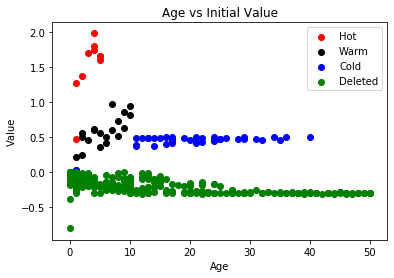

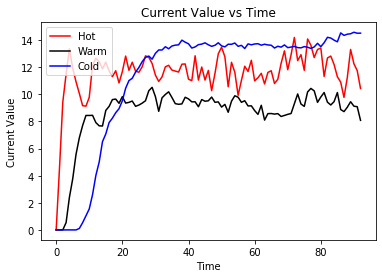

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is 0.2096581209166253, BOUNCE 0
Colds lowest value is 0.012308743966109644, BOUNCE 1
Warms lowest value is 0.01707486228179389, BOUNCE 0
Colds lowest value is 0.10924291563550477, BOUNCE 1
before Hot 0    0.0
1    0.0
2    3.0
3    0.0
4    4.0
5    4.0
6    2.0
7    0.0
8    1.0
9    4.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    1.0
2    4.0
3    1.0
4    5.0
5    5.0
6    3.0
7    1.0
8    2.0
9    5.0
Name: Age, dtype: float64
before Warm 0     5.0
1     2.0
2     9.0
3     5.0
4     2.0
5     7.0
6     8.0
7     4.0
8     9.0
9     5.0
10    7.0
11    3.0
12    5.0
13    6.0
14    5.0
15    2.0
16    6.0
17    1.0
18    4.0
19    8.0
Name: Age, dtype: float64
after Warm 20 0      6.0
1      3.0
2     10.0
3      6.0
4      3.0
5      8.0
6      9.0
7      5.0
8     10.0
9      6.0
10     8.0
11     4.0
12     6.0
13     7.0
14     6.0
15     3.0
16     7.0
17     2.0
18     5.0
19     9.0
Name: Age, dtype: float64
before Cold 0     16.0
1     21.0
2   

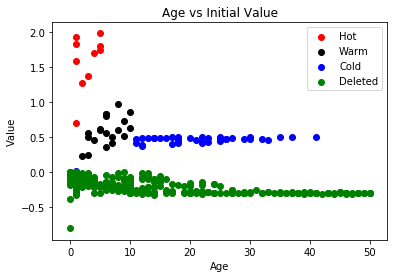

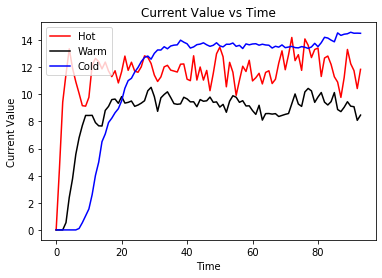

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is 0.21032672662167667, BOUNCE 0
Colds lowest value is 0.11652209115788068, BOUNCE 1
Warms lowest value is 0.25911517504093734, BOUNCE 0
Colds lowest value is 0.11420566468803618, BOUNCE 1
before Hot 0    1.0
1    1.0
2    4.0
3    1.0
4    0.0
5    0.0
6    3.0
7    0.0
8    2.0
9    0.0
Name: Age, dtype: float64
after Hot 10 0    2.0
1    2.0
2    5.0
3    2.0
4    1.0
5    1.0
6    4.0
7    1.0
8    3.0
9    1.0
Name: Age, dtype: float64
before Warm 0     6.0
1     3.0
2     5.0
3     6.0
4     3.0
5     8.0
6     9.0
7     5.0
8     5.0
9     6.0
10    8.0
11    4.0
12    1.0
13    7.0
14    6.0
15    5.0
16    7.0
17    0.0
18    5.0
19    9.0
Name: Age, dtype: float64
after Warm 20 0      7.0
1      4.0
2      6.0
3      7.0
4      4.0
5      9.0
6     10.0
7      6.0
8      6.0
9      7.0
10     9.0
11     5.0
12     2.0
13     8.0
14     7.0
15     6.0
16     8.0
17     1.0
18     6.0
19    10.0
Name: Age, dtype: float64
before Cold 0     17.0
1     22.0
2   

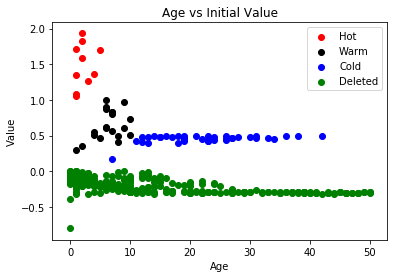

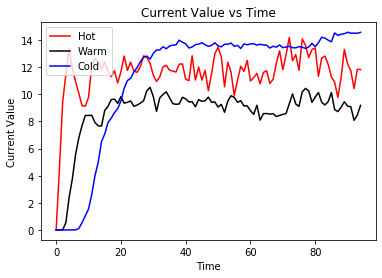

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.2693744214192598, BOUNCE 0
Colds lowest value is 0.23182485464697433, BOUNCE 1
Warms lowest value is 0.2734864869528568, BOUNCE 0
Colds lowest value is 0.1346872107096299, BOUNCE 1
Warms lowest value is 0.2844886008967829, BOUNCE 0
Colds lowest value is 0.19019477915620825, BOUNCE 1
before Hot 0    2.0
1    2.0
2    0.0
3    2.0
4    1.0
5    0.0
6    0.0
7    1.0
8    0.0
9    1.0
Name: Age, dtype: float64
after Hot 10 0    3.0
1    3.0
2    1.0
3    3.0
4    2.0
5    1.0
6    1.0
7    2.0
8    1.0
9    2.0
Name: Age, dtype: float64
before Warm 0     7.0
1     4.0
2     6.0
3     7.0
4     4.0
5     9.0
6     5.0
7     6.0
8     6.0
9     7.0
10    9.0
11    5.0
12    2.0
13    3.0
14    7.0
15    6.0
16    8.0
17    1.0
18    6.0
19    4.0
Name: Age, dtype: float64
after Warm 20 0      8.0
1      5.0
2      7.0
3      8.0
4      5.0
5     10.0
6      6.0
7      7.0
8      7.0
9      8.0
10    10.0
11     6.0
12     3.0
13   

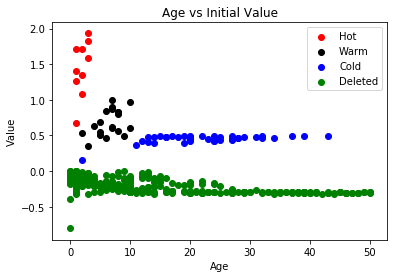

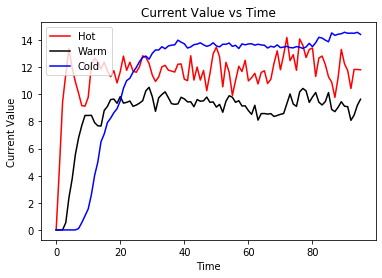

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.301014986123729, BOUNCE 0
Colds lowest value is 0.2727756155168411, BOUNCE 1
Warms lowest value is 0.31458635735077534, BOUNCE 0
Colds lowest value is 0.1703306837853146, BOUNCE 1
Warms lowest value is 0.32264822011170385, BOUNCE 0
Colds lowest value is 0.22798915701369526, BOUNCE 1
before Hot 0    3.0
1    3.0
2    1.0
3    3.0
4    0.0
5    0.0
6    1.0
7    0.0
8    1.0
9    2.0
Name: Age, dtype: float64
after Hot 10 0    4.0
1    4.0
2    2.0
3    4.0
4    1.0
5    1.0
6    2.0
7    1.0
8    2.0
9    3.0
Name: Age, dtype: float64
before Warm 0     8.0
1     5.0
2     7.0
3     8.0
4     5.0
5     0.0
6     6.0
7     7.0
8     7.0
9     8.0
10    2.0
11    6.0
12    0.0
13    4.0
14    8.0
15    7.0
16    2.0
17    2.0
18    7.0
19    5.0
Name: Age, dtype: float64
after Warm 20 0     9.0
1     6.0
2     8.0
3     9.0
4     6.0
5     1.0
6     7.0
7     8.0
8     8.0
9     9.0
10    3.0
11

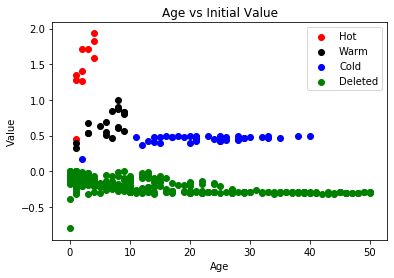

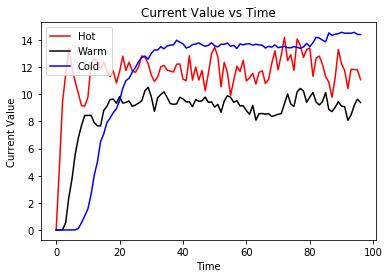

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is 0.3031524573928192, BOUNCE 0
Colds lowest value is 0.16643553712183207, BOUNCE 1
Warms lowest value is 0.21511439625883583, BOUNCE 0
Colds lowest value is 0.15795838569415316, BOUNCE 1
Warms lowest value is 0.24456154948579667, BOUNCE 0
Colds lowest value is 0.11208592226118289, BOUNCE 1
Warms lowest value is 0.3237161713483077, BOUNCE 0
Colds lowest value is 0.12228077474289833, BOUNCE 1
Warms lowest value is 0.1440183412229874, BOUNCE 0
Colds lowest value is 0.21603072581016322, BOUNCE 1
before Hot 0    4.0
1    4.0
2    0.0
3    4.0
4    1.0
5    1.0
6    2.0
7    0.0
8    2.0
9    3.0
Name: Age, dtype: float64
after Hot 10 0    5.0
1    5.0
2    1.0
3    5.0
4    2.0
5    2.0
6    3.0
7    1.0
8    3.0
9    4.0
Name: Age, dtype: float64
before Warm 0     9.0
1     6.0
2     8.0
3     9.0
4     6.0
5     2.0
6     7.0
7     8.0
8     8.0
9     9.0
10    3.0
11    0.0
12    1.0
13    5.0
14    9.0
15    8.0
16    3.0
17    3.0
18    8.0
19    6.0
Name: Age, dtyp

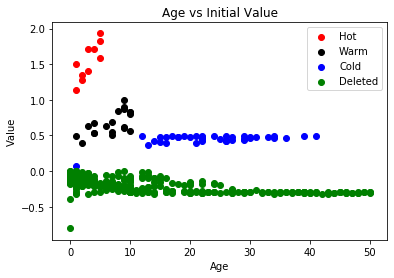

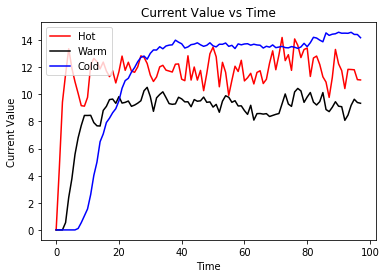

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is 0.35074324521444683, BOUNCE 0
Colds lowest value is 0.32244725960810966, BOUNCE 1
before Hot 0    0.0
1    0.0
2    1.0
3    0.0
4    2.0
5    2.0
6    3.0
7    1.0
8    3.0
9    4.0
Name: Age, dtype: float64
after Hot 10 0    1.0
1    1.0
2    2.0
3    1.0
4    3.0
5    3.0
6    4.0
7    2.0
8    4.0
9    5.0
Name: Age, dtype: float64
before Warm 0     5.0
1     0.0
2     9.0
3     5.0
4     7.0
5     3.0
6     8.0
7     9.0
8     9.0
9     5.0
10    4.0
11    1.0
12    2.0
13    6.0
14    0.0
15    9.0
16    4.0
17    4.0
18    9.0
19    7.0
Name: Age, dtype: float64
after Warm 20 0      6.0
1      1.0
2     10.0
3      6.0
4      8.0
5      4.0
6      9.0
7     10.0
8     10.0
9      6.0
10     5.0
11     2.0
12     3.0
13     7.0
14     1.0
15    10.0
16     5.0
17     5.0
18    10.0
19     8.0
Name: Age, dtype: float64
before Cold 0     21.0
1     26.0
2     15.0
3     26.0
4     20.0
5      7.0
6     22.0
7     34.0
8     

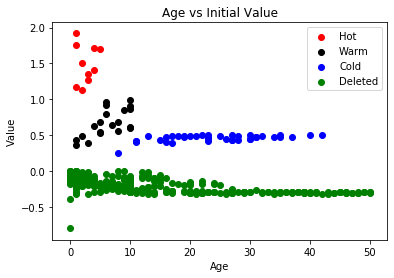

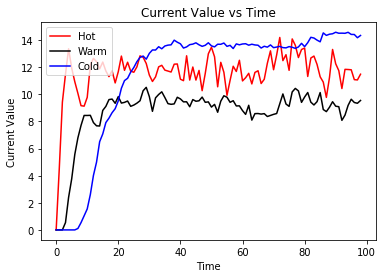

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
Warms lowest value is nan, BOUNCE 0
before Hot 0    1.0
1    1.0
2    0.0
3    1.0
4    3.0
5    3.0
6    4.0
7    2.0
8    4.0
9    0.0
Name: Age, dtype: float64
after Hot 10 0    2.0
1    2.0
2    1.0
3    2.0
4    4.0
5    4.0
6    5.0
7    3.0
8    5.0
9    1.0
Name: Age, dtype: float64
before Warm 0     6.0
1     1.0
2     5.0
3     6.0
4     8.0
5     4.0
6     9.0
7     0.0
8     0.0
9     6.0
10    5.0
11    2.0
12    3.0
13    7.0
14    1.0
15    0.0
16    5.0
17    5.0
18    2.0
19    8.0
Name: Age, dtype: float64
after Warm 20 0      7.0
1      2.0
2      6.0
3      7.0
4      9.0
5      5.0
6     10.0
7      1.0
8      1.0
9      7.0
10     6.0
11     3.0
12     4.0
13     8.0
14     2.0
15     1.0
16     6.0
17     6.0
18     3.0
19     9.0
Name: Age, dtype: float64
before Cold 0     22.0
1     27.0
2     16.0
3     27.0
4     21.0
5     10.0
6     23.0
7     35.0
8 

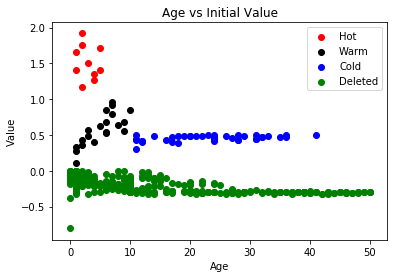

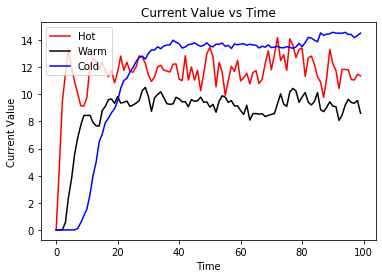

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

Warms lowest value is 0.2604803055023829, BOUNCE 0
Colds lowest value is 0.05600207666799891, BOUNCE 1
Warms lowest value is 0.06591759140976505, BOUNCE 0
Colds lowest value is 0.13572394865650478, BOUNCE 1
Warms lowest value is 0.3128276041855315, BOUNCE 0
Colds lowest value is 0.032958795704882526, BOUNCE 1
before Hot 0    2.0
1    2.0
2    1.0
3    2.0
4    0.0
5    0.0
6    0.0
7    3.0
8    0.0
9    1.0
Name: Age, dtype: float64
after Hot 10 0    3.0
1    3.0
2    2.0
3    3.0
4    1.0
5    1.0
6    1.0
7    4.0
8    1.0
9    2.0
Name: Age, dtype: float64
before Warm 0     7.0
1     2.0
2     6.0
3     7.0
4     9.0
5     5.0
6     5.0
7     4.0
8     5.0
9     7.0
10    6.0
11    3.0
12    4.0
13    8.0
14    2.0
15    4.0
16    6.0
17    6.0
18    3.0
19    9.0
Name: Age, dtype: float64
after Warm 20 0      8.0
1      3.0
2      7.0
3      8.0
4     10.0
5      6.0
6      6.0
7      5.0
8      6.0
9      8.0
10     7.0
11     4.0
12     5.0
13     9.0
14     3.0
15     5.0
16   

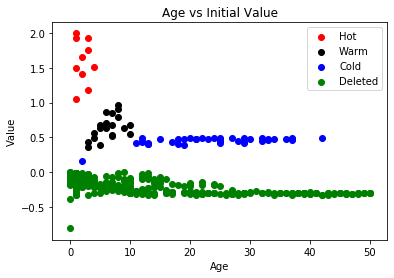

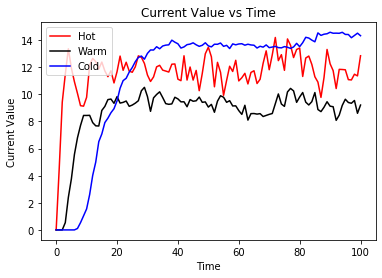

[[9.0, 0.0019480839378637862], [8.0, 0.0076699030514217285], [13.0, 0.014227391081019863], [1.0, 0.0038273330588105775], [12.0, 0.01918621634530453], [3.0, 0.020059052606602082], [6.0, 0.04894217864153033], [13.0, 0.05508335907491146], [15.0, 0.06310931499504141], [4.0, 0.06569270048242161], [12.0, 0.06540139263698315], [1.0, 0.06836173091935312], [8.0, 0.06923615727208042], [7.0, 0.07203726078564157], [0.0, 0.014790339044132628], [2.0, 0.07250189751603466], [10.0, 0.07490077715903737], [2.0, 0.08578349100289881], [1.0, 0.038163037529827984], [10.0, 0.09150870035906594], [9.0, 0.09086182160760684], [12.0, 0.09644102454000135], [1.0, 0.03233095289539329], [14.0, 0.09714534842419241], [16.0, 0.10007688272302638], [1.0, 0.09824425418263714], [15.0, 0.09963911130668221], [13.0, 0.10146964031550205], [1.0, 0.04942970332622257], [0.0, 0.054464017023465594], [14.0, 0.10373438916564659], [10.0, 0.10922877551350303], [15.0, 0.11102865877665456], [9.0, 0.11505084458935012], [2.0, 0.1151636716606

In [10]:
env.__myinit__(env_config)
np.random.seed(1)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals_plot = [[0],[0],[0]]
t = 0

for q in np.arange(100):
    # New batch of 5 lines, here represented by 5 random values
    batch = pd.read_csv("dns.log",header = 0)
    vals = pd.DataFrame(np.random.random((batch_size,3)),columns=['Age','Key Terrain','Queries'])
    vals['Age'] = 0
    val_tot = vals.drop(['Age'],axis=1).sum(axis=1).values
    rplan = np.hstack((np.mgrid[0:batch_size, 1:4][1].astype(int),np.zeros(batch_size).reshape(-1,1).astype(int)))
    ind = np.zeros(batch_size).astype(int)
    loop += batch_size
    db = dataBatch(batch,vals,val_tot,ind,rplan)

    toy_agents.batch_load_static(env, db, 100)
    t += 1
    env.render(out=0)
    clr = ['r','k','b']
    sub = plt.subplot()
    sub.set_title('Current Value vs Time')
    sub.set_xlabel('Time')
    sub.set_ylabel('Current Value')
    for i in np.arange(env.num_ds):
        vals_plot[i].append(sum(np.nan_to_num(env.ds[env.names[i+1]].dataBatch.get('val_tot'))))
        sub.plot(np.arange(t+1),vals_plot[i], c = clr[i], label = env.names[i+1])

    sub.legend(loc=2)
    plt.show()

    #env.render(out=1)
    print(env.del_val)